# ***Comparative Research For Predicting Remaining Useful Life Of A Turbofan Jet Engine Using ML And DL Techniques***

- Predictions of RUL will be done using C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) dataset through various machine learning models

- Link to the C-MAPSS dataset - https://www.kaggle.com/datasets/behrad3d/nasa-cmaps
- The scope of this study is to analyse and assess various methods of estimating the RUL of turbofan jet engines from different techniques such as classical ML models and contemporary DL approaches

- We will analyse the models’ effectiveness in predicting RUL as well as their efficiency in terms of computational resources

- The aim is to find the most effective and cost-effective model suitable for real-time monitoring and mitigation planning of engine health

<a id='top'></a>
## <div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"><b> Table of Contents </b></h1>

 - [**Step 1: Reading the Dataset and Initial Understanding**](#1)

 - [**Step 2: Dataset Cleaning and Dataset Transformation before EDA**](#2)
 
 - [**Step 3: Performing EDA**](#3)
    
 - [**Step 4: Pre-Processing of the Training, Testing and RUL Datasets**](#4)
    
 - [**Step 5: Splitting the Data into Training Set and Test Set**](#5)
    
 - [**Step 6: Data Pre-Processing Steps**](#6)
    
 - [**Step 7: Model Building**](#7)
    - [**A. Machine Learning Models**](#7.A)
        * [**Model 1: Simple Linear Regression (SLR)**](#7.1)
        * [**Model 2: Support Vector Regression (SVR) Model**](#7.2)
        * [**Model 3: Decision Tree Regression (DT) Model**](#7.3)
        * [**Model 4: Gradient Boosting Regression (GBR) Model**](#7.4)
        * [**Model 5: LightGBM Regression Model**](#7.5)
        * [**Model 6: AdaBoost Regression Model**](#7.6)
        * [**Model 7: XGBoost Regression Model**](#7.7)
        * [**Model 8: Random Forest Model**](#7.8)
        * [**Model 9: k-Nearest Neighbors (KNN) Regression Model**](#7.9)
    
    - [**B. Deep Learning Models**](#7.B)
        * [**Model 10: Convolutional Neural Network (CNN)**](#7.10)
        * [**Model 11: Long Short-Term Memory (LSTM)**](#7.11)
        * [**Model 12: Bidirectional Long Short-Term Memory (Bi-LSTM)**](#7.12)
        * [**Model 13: Attention-Based Multihead (AMH) Model**](#7.13)
        * [**Model 14: Hybrid Model (CNN + LSTM)**](#7.14)
    
 - [**Evaluation**](#8)
 - [**Conclusion**](#9)

### Importing the Required Libraries

In [1]:
#Ignoring the warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import time

### Importing the SKLearn Library

In [3]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

### Importing Tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.layers import Dense, LSTM, Conv1D, BatchNormalization, Dropout, TimeDistributed, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [5]:
# Set the random seed for reproducibility
SEED = 16

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

### Importing Models

In [6]:
import lightgbm as lgb
from xgboost import XGBRegressor

In [7]:
#Changing settings to see maximum data 

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

<a id='1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 1: Reading the Dataset and Initial Understanding</b>

### **Dataset Information:**
<br>

**DESCRIPTION**: FD001 consists of data from a single operating condition and a single fault mode, offering a controlled and uniform environment for analysis.

**USE**: This dataset is well-suited for evaluating a model's performance in predicting failures under consistent operational settings.
- Data Set: FD001
- Train trjectories: 100
- Test trajectories: 100
- Conditions: ONE (Sea Level)
- Fault Modes: ONE (HPC Degradation)

In [8]:
# Declaring Variables

# Column Names

index_names = ["Engine_ID", "Cycles"]
operational_setting_names = ["Operational_Setting_1_Altitude", "Operational_Setting_2_Mach_Number", "Operational_Setting_3_Sea_Level_Temperature"]
sensor_names = ["S1_Total_Temp_Fan_Inlet", "S2_Total_Temp_LPC_Outlet", "S3_Total_Temp_HPC_Outlet", "S4_Total_Temp_LPT_Outlet", "S5_Pressue_Fan_Inlet", 
                "S6_Total_Pressure_Bypass_Duct", "S7_Total_Pressue_HPC_Outlet", "S8_Physical_Fan_Speed", "S9_Physical_Core_Speed", "S10_Engine_Pressure_Ratio", 
                "S11_Static_Pressure_HPC_Outlet", "S12_Ratio_Of_Fule_Flow_To_PS30", "S13_Corrected_Fan_Speed", "S14_Corrected_Core_Speed", "S15_Bypass_Ratio", 
                "S16_Burner_Fuel_Air_Ratio", "S17_Bleed_Enthalpy", "S18_Demanded_Fan_Speed", "S19_Demanded_Corrected_Fan_Speed", "S20_HPT_Coolant_Bleed", 
                "S21_LPT_Coolant_Bleed"]

y_vars = operational_setting_names + sensor_names


# List of the Column Names

col_names = index_names + operational_setting_names + sensor_names



# Reading Paths for the "FD001" Dataset

train_path = r"C:\Users\heyit\Desktop\Jupyter Notebooks\UpGrad\Final Thesis Report\Dataset\CMAPPS_Dataset\CMaps\train_FD001.txt"
test_path = r"C:\Users\heyit\Desktop\Jupyter Notebooks\UpGrad\Final Thesis Report\Dataset\CMAPPS_Dataset\CMaps\test_FD001.txt"
rul_path = r"C:\Users\heyit\Desktop\Jupyter Notebooks\UpGrad\Final Thesis Report\Dataset\CMAPPS_Dataset\CMaps\RUL_FD001.txt"

In [9]:
# Reading the datasets

df_train = pd.read_csv(train_path, sep = "\s+", header = None, names = col_names)
df_test = pd.read_csv(test_path, sep = "\s+", header = None, names = col_names)
df_rul = pd.read_csv(rul_path, sep = "\s+", header = None, names = ["RUL"])

In [10]:
# Adding "Engine_ID" column in the "RUL" dataset

df_rul["Engine_ID"] = df_rul.index + 1

In [11]:
#Checking the first few rows of the "Training" dataset

df_train.head()

Engine_ID  Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
0          1       1                         -0.0007                            -0.0004                                        100.0                   518.67                    641.82                   1589.70                   1400.60                 14.62                          21.61                       554.36                2388.06                 9046.19                        1.3                           47.47                          521.66                  2388.02                   8138.62            8.4195                       0.03                 392                    2388                             100.0                  39.06                23.4190
1          1       2                          0.0019                            -0.0003                                        100.0                   518.67                    642.15                   1591.82                   1403.14                 14.62                          21.61                       553.75                2388.04                 9044.07                        1.3                           47.49                          522.28                  2388.07                   8131.49            8.4318                       0.03                 392                    2388                             100.0                  39.00                23.4236
2          1       3                         -0.0043                             0.0003                                        100.0                   518.67                    642.35                   1587.99                   1404.20                 14.62                          21.61                       554.26                2388.08                 9052.94                        1.3                           47.27                          522.42                  2388.03                   8133.23            8.4178                       0.03                 390                    2388                             100.0                  38.95                23.3442
3          1       4                          0.0007                             0.0000                                        100.0                   518.67                    642.35                   1582.79                   1401.87                 14.62                          21.61                       554.45                2388.11                 9049.48                        1.3                           47.13                          522.86                  2388.08                   8133.83            8.3682                       0.03                 392                    2388                             100.0                  38.88                23.3739
4          1       5                         -0.0019                            -0.0002                                        100.0                   518.67                    642.37                   1582.85                   1406.22                 14.62                          21.61                       554.00                2388.06                 9055.15                        1.3                           47.28                          522.19                  2388.04                   8133.80            8.4294                       0.03                 393                    2388                            

In [12]:
#Checking the first few rows of the "Testing" dataset

df_test.head()

Engine_ID  Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
0          1       1                          0.0023                             0.0003                                        100.0                   518.67                    643.02                   1585.29                   1398.21                 14.62                          21.61                       553.90                2388.04                 9050.17                        1.3                           47.20                          521.72                  2388.03                   8125.55            8.4052                       0.03                 392                    2388                             100.0                  38.86                23.3735
1          1       2                         -0.0027                            -0.0003                                        100.0                   518.67                    641.71                   1588.45                   1395.42                 14.62                          21.61                       554.85                2388.01                 9054.42                        1.3                           47.50                          522.16                  2388.06                   8139.62            8.3803                       0.03                 393                    2388                             100.0                  39.02                23.3916
2          1       3                          0.0003                             0.0001                                        100.0                   518.67                    642.46                   1586.94                   1401.34                 14.62                          21.61                       554.11                2388.05                 9056.96                        1.3                           47.50                          521.97                  2388.03                   8130.10            8.4441                       0.03                 393                    2388                             100.0                  39.08                23.4166
3          1       4                          0.0042                             0.0000                                        100.0                   518.67                    642.44                   1584.12                   1406.42                 14.62                          21.61                       554.07                2388.03                 9045.29                        1.3                           47.28                          521.38                  2388.05                   8132.90            8.3917                       0.03                 391                    2388                             100.0                  39.00                23.3737
4          1       5                          0.0014                             0.0000                                        100.0                   518.67                    642.51                   1587.19                   1401.92                 14.62                          21.61                       554.16                2388.01                 9044.55                        1.3                           47.31                          522.15                  2388.03                   8129.54            8.4031                       0.03                 390                    2388                            

In [13]:
#Checking the first few rows of the "RUL" dataset

df_rul.head()

RUL  Engine_ID
0  112          1
1   98          2
2   69          3
3   82          4
4   91          5

In [14]:
# Checking the shapes of the Datasets

print("Shape of the Training Dataset: ", df_train.shape)
print("Shape of the Testing Dataset: ", df_test.shape)
print("Shape of the RUL dataset: ", df_rul.shape)

Shape of the Training Dataset:  (20631, 26)
Shape of the Testing Dataset:  (13096, 26)
Shape of the RUL dataset:  (100, 2)


In [15]:
# Checking the datatype of the columns in the Training dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Engine_ID                                    20631 non-null  int64  
 1   Cycles                                       20631 non-null  int64  
 2   Operational_Setting_1_Altitude               20631 non-null  float64
 3   Operational_Setting_2_Mach_Number            20631 non-null  float64
 4   Operational_Setting_3_Sea_Level_Temperature  20631 non-null  float64
 5   S1_Total_Temp_Fan_Inlet                      20631 non-null  float64
 6   S2_Total_Temp_LPC_Outlet                     20631 non-null  float64
 7   S3_Total_Temp_HPC_Outlet                     20631 non-null  float64
 8   S4_Total_Temp_LPT_Outlet                     20631 non-null  float64
 9   S5_Pressue_Fan_Inlet                         20631 non-null  float64
 10

In [16]:
# Checking the summary of the Training dataset

df_train.describe()

Engine_ID        Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
count  20631.000000  20631.000000                    20631.000000                       20631.000000                                      20631.0             2.063100e+04              20631.000000              20631.000000              20631.000000          2.063100e+04                   20631.000000                 20631.000000           20631.000000            20631.000000               2.063100e+04                    20631.000000                    20631.000000             20631.000000              20631.000000      20631.000000               2.063100e+04        20631.000000                 20631.0                           20631.0           20631.000000           20631.000000
mean      51.506568    108.807862                       -0.000009                           0.000002                                        100.0             5.186700e+02                642.680934               1590.523119               1408.933782          1.462000e+01                      21.609803                   553.367711            2388.096652             9065.242941               1.300000e+00                       47.541168                      521.413470              2388.096152               8143.752722          8.442146               3.000000e-02          393.210654                  2388.0                             100.0              38.816271              23.289705
std       29.227633     68.880990                        0.002187                           0.000293                                          0.0             6.537152e-11                  0.500053                  6.131150                  9.000605          3.394700e-12                       0.001389                     0.885092               0.070985               22.082880               4.660829e-13                        0.267087                        0.737553                 0.071919                 19.076176          0.037505               1.556432e-14            1.548763                     0.0                               0.0               0.180746               0.108251
min        1.000000      1.000000                       -0.008700                          -0.000600                                        100.0             5.186700e+02                641.210000               1571.040000               1382.250000          1.462000e+01                      21.600000                   549.850000            2387.900000             9021.730000               1.300000e+00                       46.850000                      518.690000              2387.880000               8099.940000          8.324900               3.000000e-02          388.000000                  2388.0                             100.0              38.140000              22.894200
25%       26.000000     52.000000                       -0.001500                          -0.000200                                        100.0             5.186700e+02                642.325000               1586.260000               1402.360000          1.462000e+01                      21.610000                   552.810000            2388.050000             9053.100000               1.300000e+00                       47.350000                      520.960000              2388.040000               8133.245000          8.414900               3.000000e-02 

In [17]:
# Checking the datatype of the columns in the Testing dataset

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Engine_ID                                    13096 non-null  int64  
 1   Cycles                                       13096 non-null  int64  
 2   Operational_Setting_1_Altitude               13096 non-null  float64
 3   Operational_Setting_2_Mach_Number            13096 non-null  float64
 4   Operational_Setting_3_Sea_Level_Temperature  13096 non-null  float64
 5   S1_Total_Temp_Fan_Inlet                      13096 non-null  float64
 6   S2_Total_Temp_LPC_Outlet                     13096 non-null  float64
 7   S3_Total_Temp_HPC_Outlet                     13096 non-null  float64
 8   S4_Total_Temp_LPT_Outlet                     13096 non-null  float64
 9   S5_Pressue_Fan_Inlet                         13096 non-null  float64
 10

In [18]:
# Checking the summary of the Testing dataset

df_test.describe()

Engine_ID        Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
count  13096.000000  13096.000000                    13096.000000                       13096.000000                                      13096.0             1.309600e+04              13096.000000              13096.000000              13096.000000          1.309600e+04                   13096.000000                 13096.000000           13096.000000            13096.000000               1.309600e+04                    13096.000000                    13096.000000             13096.000000              13096.000000      13096.000000               1.309600e+04        13096.000000                 13096.0                           13096.0           13096.000000           13096.000000
mean      51.543907     76.836515                       -0.000011                           0.000004                                        100.0             5.186700e+02                642.475088               1588.099204               1404.735362          1.462000e+01                      21.609701                   553.757523            2388.070964             9058.407363               1.300000e+00                       47.416204                      521.747724              2388.071025               8138.947817          8.425844               3.000000e-02          392.571625                  2388.0                             100.0              38.892502              23.335743
std       28.289423     53.057749                        0.002203                           0.000294                                          0.0             6.014263e-11                  0.400899                  5.003274                  6.688309          2.671743e-12                       0.001704                     0.681286               0.057442               11.436261               3.157595e-13                        0.195917                        0.559627                 0.056934                 10.188605          0.029009               8.823140e-15            1.233577                     0.0                               0.0               0.141681               0.084120
min        1.000000      1.000000                       -0.008200                          -0.000600                                        100.0             5.186700e+02                641.130000               1569.040000               1384.390000          1.462000e+01                      21.600000                   550.880000            2387.890000             9024.530000               1.300000e+00                       46.800000                      519.380000              2387.890000               8108.500000          8.332800               3.000000e-02          389.000000                  2388.0                             100.0              38.310000              22.935400
25%       28.000000     33.000000                       -0.001500                          -0.000200                                        100.0             5.186700e+02                642.197500               1584.600000               1399.950000          1.462000e+01                      21.610000                   553.310000            2388.030000             9051.020000               1.300000e+00                       47.270000                      521.380000              2388.030000               8132.310000          8.405600               3.000000e-02 

In [19]:
# Checking the datatype of the columns in the RUL dataset

df_rul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   RUL        100 non-null    int64
 1   Engine_ID  100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [20]:
# Checking the summary of the RUL dataset

df_rul.describe()

RUL   Engine_ID
count  100.00000  100.000000
mean    75.52000   50.500000
std     41.76497   29.011492
min      7.00000    1.000000
25%     32.75000   25.750000
50%     86.00000   50.500000
75%    112.25000   75.250000
max    145.00000  100.000000

<a id='2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 2: Dataset Cleaning and Dataset Transformation before EDA </b>

In [21]:
# Checking the null values in the Training dataset

df_train.isnull().sum()

Engine_ID                                      0
Cycles                                         0
Operational_Setting_1_Altitude                 0
Operational_Setting_2_Mach_Number              0
Operational_Setting_3_Sea_Level_Temperature    0
S1_Total_Temp_Fan_Inlet                        0
S2_Total_Temp_LPC_Outlet                       0
S3_Total_Temp_HPC_Outlet                       0
S4_Total_Temp_LPT_Outlet                       0
S5_Pressue_Fan_Inlet                           0
S6_Total_Pressure_Bypass_Duct                  0
S7_Total_Pressue_HPC_Outlet                    0
S8_Physical_Fan_Speed                          0
S9_Physical_Core_Speed                         0
S10_Engine_Pressure_Ratio                      0
S11_Static_Pressure_HPC_Outlet                 0
S12_Ratio_Of_Fule_Flow_To_PS30                 0
S13_Corrected_Fan_Speed                        0
S14_Corrected_Core_Speed                       0
S15_Bypass_Ratio                               0
S16_Burner_Fuel_Air_

In [22]:
# Checking the null values in the Testing dataset

df_test.isnull().sum()

Engine_ID                                      0
Cycles                                         0
Operational_Setting_1_Altitude                 0
Operational_Setting_2_Mach_Number              0
Operational_Setting_3_Sea_Level_Temperature    0
S1_Total_Temp_Fan_Inlet                        0
S2_Total_Temp_LPC_Outlet                       0
S3_Total_Temp_HPC_Outlet                       0
S4_Total_Temp_LPT_Outlet                       0
S5_Pressue_Fan_Inlet                           0
S6_Total_Pressure_Bypass_Duct                  0
S7_Total_Pressue_HPC_Outlet                    0
S8_Physical_Fan_Speed                          0
S9_Physical_Core_Speed                         0
S10_Engine_Pressure_Ratio                      0
S11_Static_Pressure_HPC_Outlet                 0
S12_Ratio_Of_Fule_Flow_To_PS30                 0
S13_Corrected_Fan_Speed                        0
S14_Corrected_Core_Speed                       0
S15_Bypass_Ratio                               0
S16_Burner_Fuel_Air_

In [23]:
# Checking the null values in the RUL dataset

df_rul.isnull().sum()

RUL          0
Engine_ID    0
dtype: int64

#### *Inference: There are no null values present in any of the columns of the Training, Testing and RUL datasets.*

In [24]:
# Creating a new dataset from Training and Testing datasests to check for duplicates

traindup_check = df_train

testdup_check = df_test

In [25]:
# Comparing if the shape of the new dataset after removing the duplicates is the sames as that of the Training dataset

traindup_check.drop_duplicates().shape == df_train.shape

True

In [26]:
# Comparing if the shape of the new dataset after removing the duplicates is the sames as that of the Testing dataset

testdup_check.drop_duplicates().shape == df_test.shape

True

#### *Inference: As the shape of the dataset remains same after dropping duplicates, it means that there are no duplicate rows present in the Training and Testing datasets.*

<a id='3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 3: Performing EDA </b>

#### i) Visualizing the Engine Lifetime Cycles

In [27]:
# Calculate maximum cycles per "Engine_ID" in the Training dataset

train_engineid_cycles = df_train.groupby("Engine_ID")["Cycles"].max().reset_index()
train_engineid_cycles.columns = ["Engine_ID", "Engine_Cycles"]

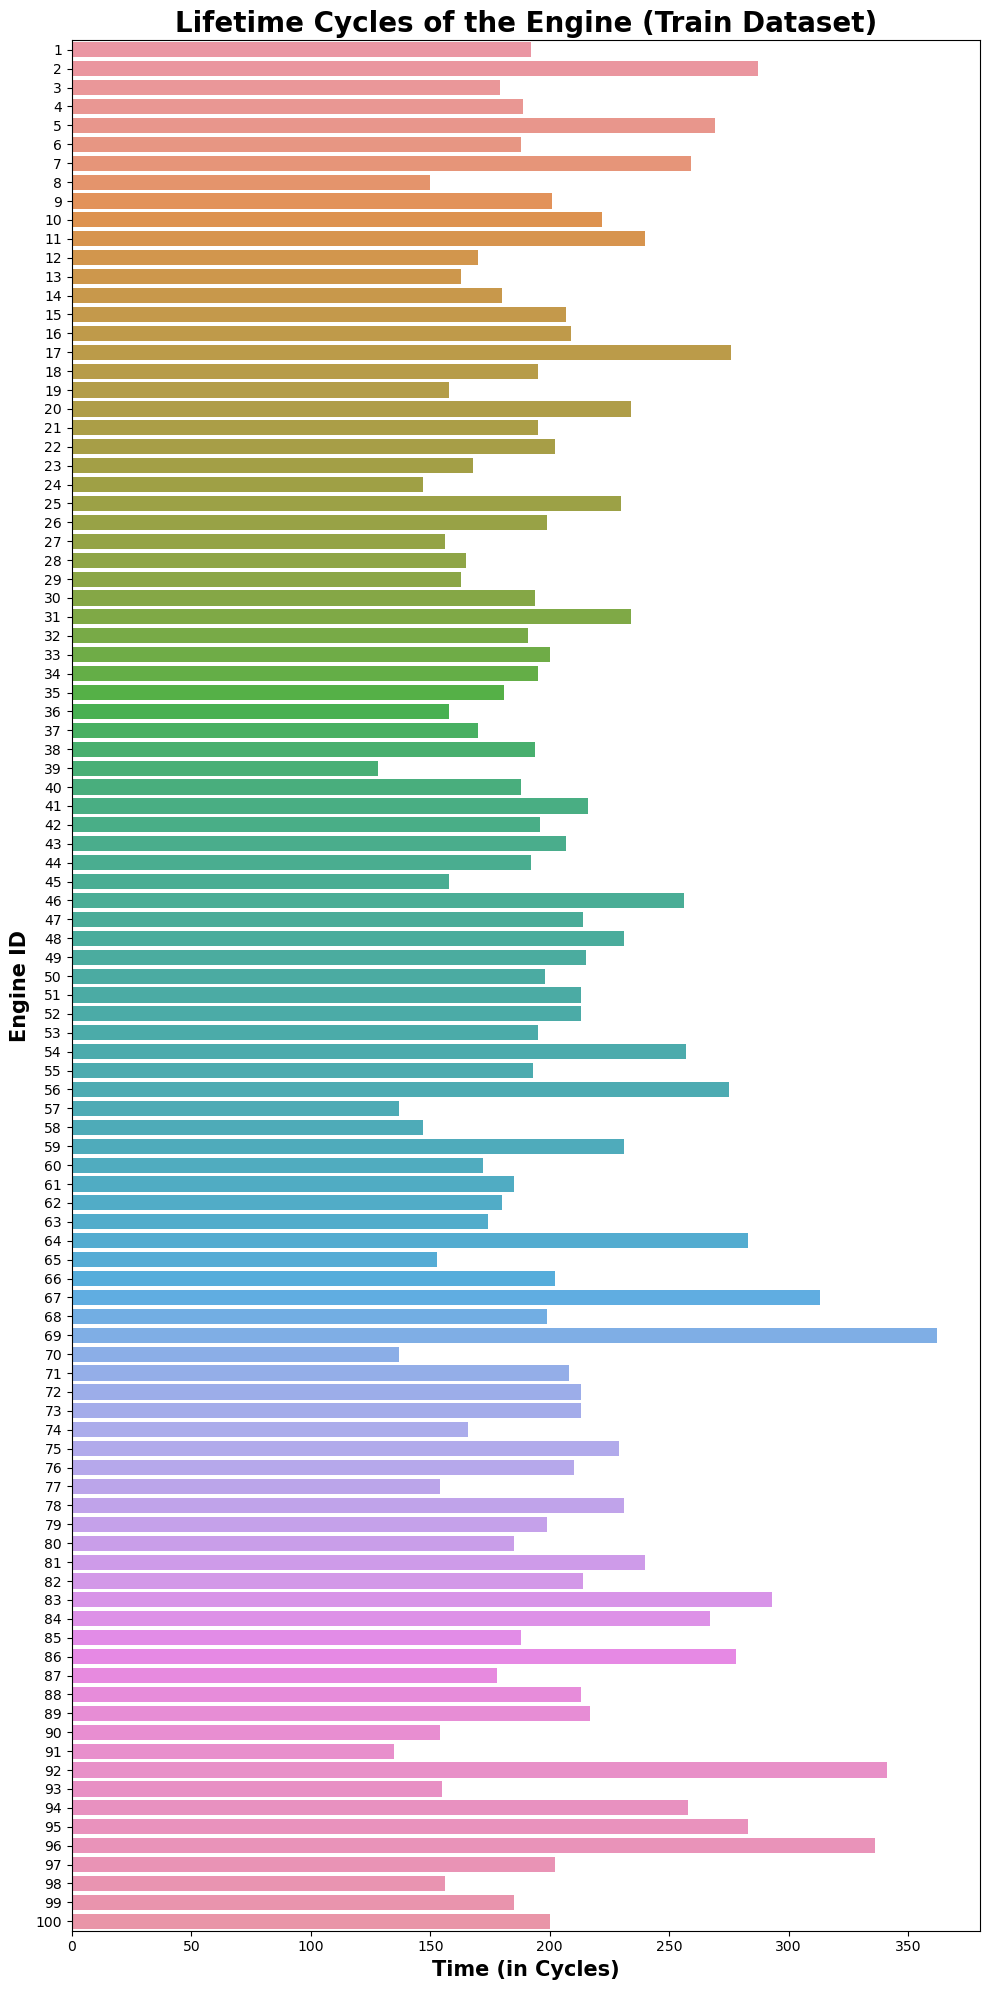

In [28]:
# Visualizing the Engine Lifetime Cycles for the Training dataset

plt.figure(figsize=(10, 20))

sns.barplot(data = train_engineid_cycles, y = "Engine_ID", x = "Engine_Cycles", orient="h")
plt.title("Lifetime Cycles of the Engine (Train Dataset)", fontweight="bold", size=20)
plt.xlabel("Time (in Cycles)", fontweight="bold", size=15)
plt.ylabel("Engine ID", fontweight="bold", size=15)
plt.yticks(size=10)
plt.xticks(size=10)
plt.tight_layout()
plt.show()

#### ii) Visualizing the Maximum Engine Cycles

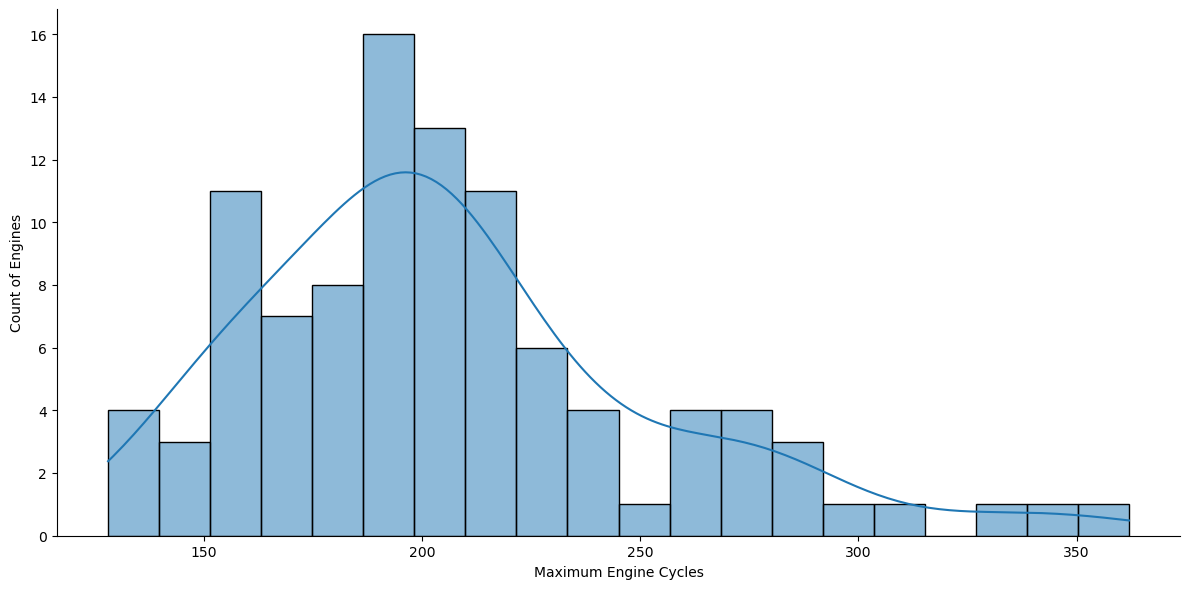

In [29]:
# Distribution of the Maximum Engine Cycles

sns.displot(train_engineid_cycles['Engine_Cycles'], kde = True, bins = 20, height = 6, aspect = 2)
plt.xlabel('Maximum Engine Cycles');
plt.ylabel('Count of Engines');

#### *Inference: The histogram indicates that the majority of engines fail around 200 cycles. Additionally, the distribution is right-skewed, with only a small number of engines operating beyond 300 cycles.*

#### iii) Visualizing the Distribution of Operational Settings and Sensor Variables

#### Operational Settings (OS1 to OS3) and Sensor Readings (S1 to S21)

- The following visualizations display the distribution of all sensor readings (S1 to S21) across engine units in the training dataset
- This analysis is intended to explore the behavior of each sensor variable, assess their variability, and identify any patterns or anomalies
- Understanding these distributions is crucial for characterizing the dataset and informing preprocessing or feature engineering steps in the modeling pipeline

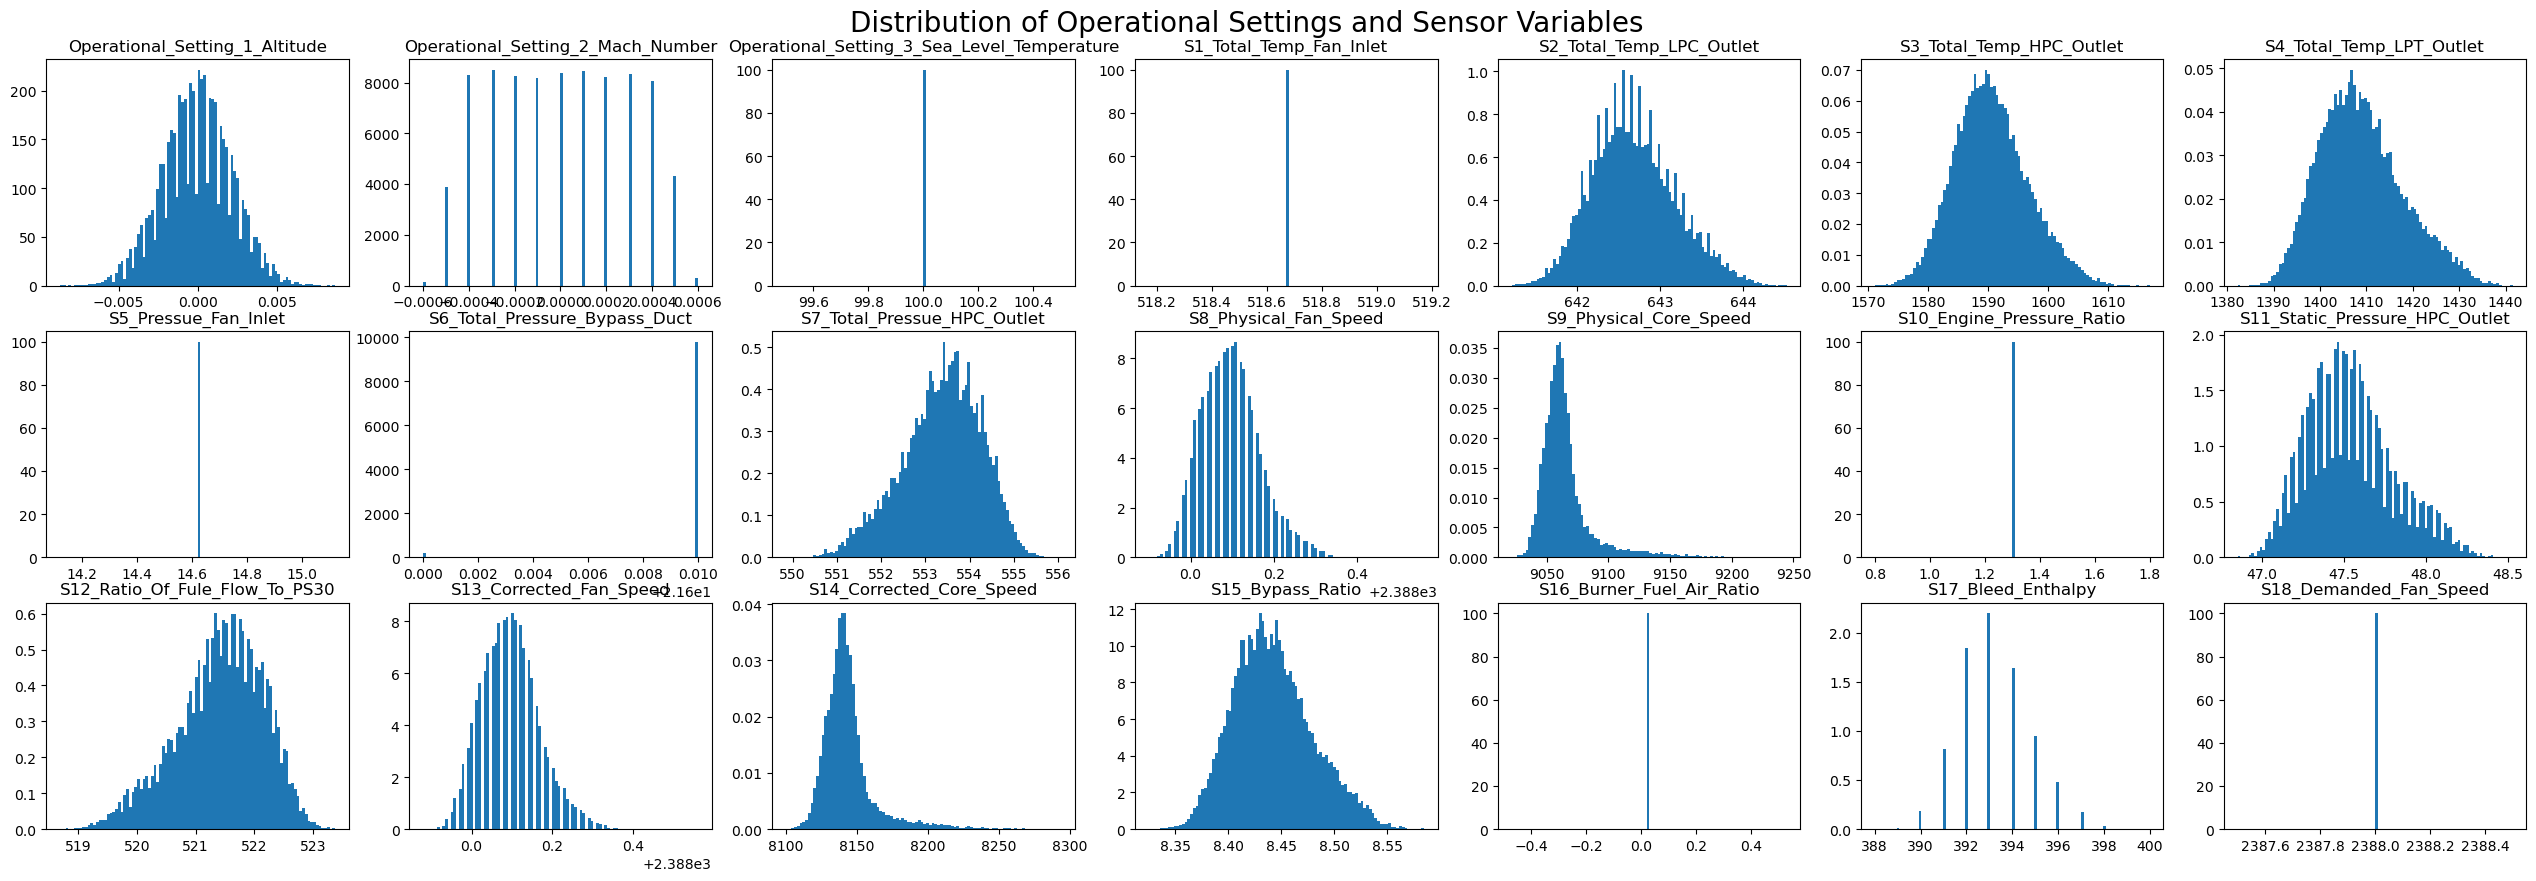

In [30]:
x = df_train.drop(index_names,axis=1)
fig, axs = plt.subplots(3, 7, figsize=(32, 10))

for f, ax in zip(x.columns, axs.ravel()):
    # Plotting Histograms
    ax.hist(x[f], density=True, bins=100)
    ax.set_title(f)
    
plt.suptitle("Distribution of Operational Settings and Sensor Variables", y = 0.93, fontsize=20)
plt.show()

#### *Infernce: Feature Analysis and Selection*

During EDA, the following variables were found to exhibit constant or near-constant values across all engine units:

- **Constant setting parameter:** Constant setting parameter "Operational_Setting_3_Sea_Level_Temperature"
- **Sensors with constant or near-constant readings:** "S1_Total_Temp_Fan_Inlet", "S5_Pressue_Fan_Inlet", "S6_Total_Pressure_Bypass_Duct", "S10_Engine_Pressure_Ratio", "S16_Burner_Fuel_Air_Ratio", "S18_Demanded_Fan_Speed" and "S19_Demanded_Corrected_Fan_Speed"

- These features, being nearly invariant, do not contribute meaningful information to the analysis. Eliminating them is advantageous as they introduce little variability and may potentially hinder model performance

- Before removal, further exploratory analyses will be conducted. Box plots and individual variable behavior analyses concerning the cycle count will be performed separately for a systematic sample of engines (e.g., four selected engines out of 100). This step aims to confirm the reasons behind the constant nature of these features and solidify the decision to eliminate them

- Additionally, during the analysis, it was observed that some retained features exhibit normal distributions, while others display slight skewness. Understanding these distribution patterns provides valuable insights into the characteristics of the dataset and helps in making informed decisions for further analysis

#### iv) Detecting Outliers in the Variables using Boxplots

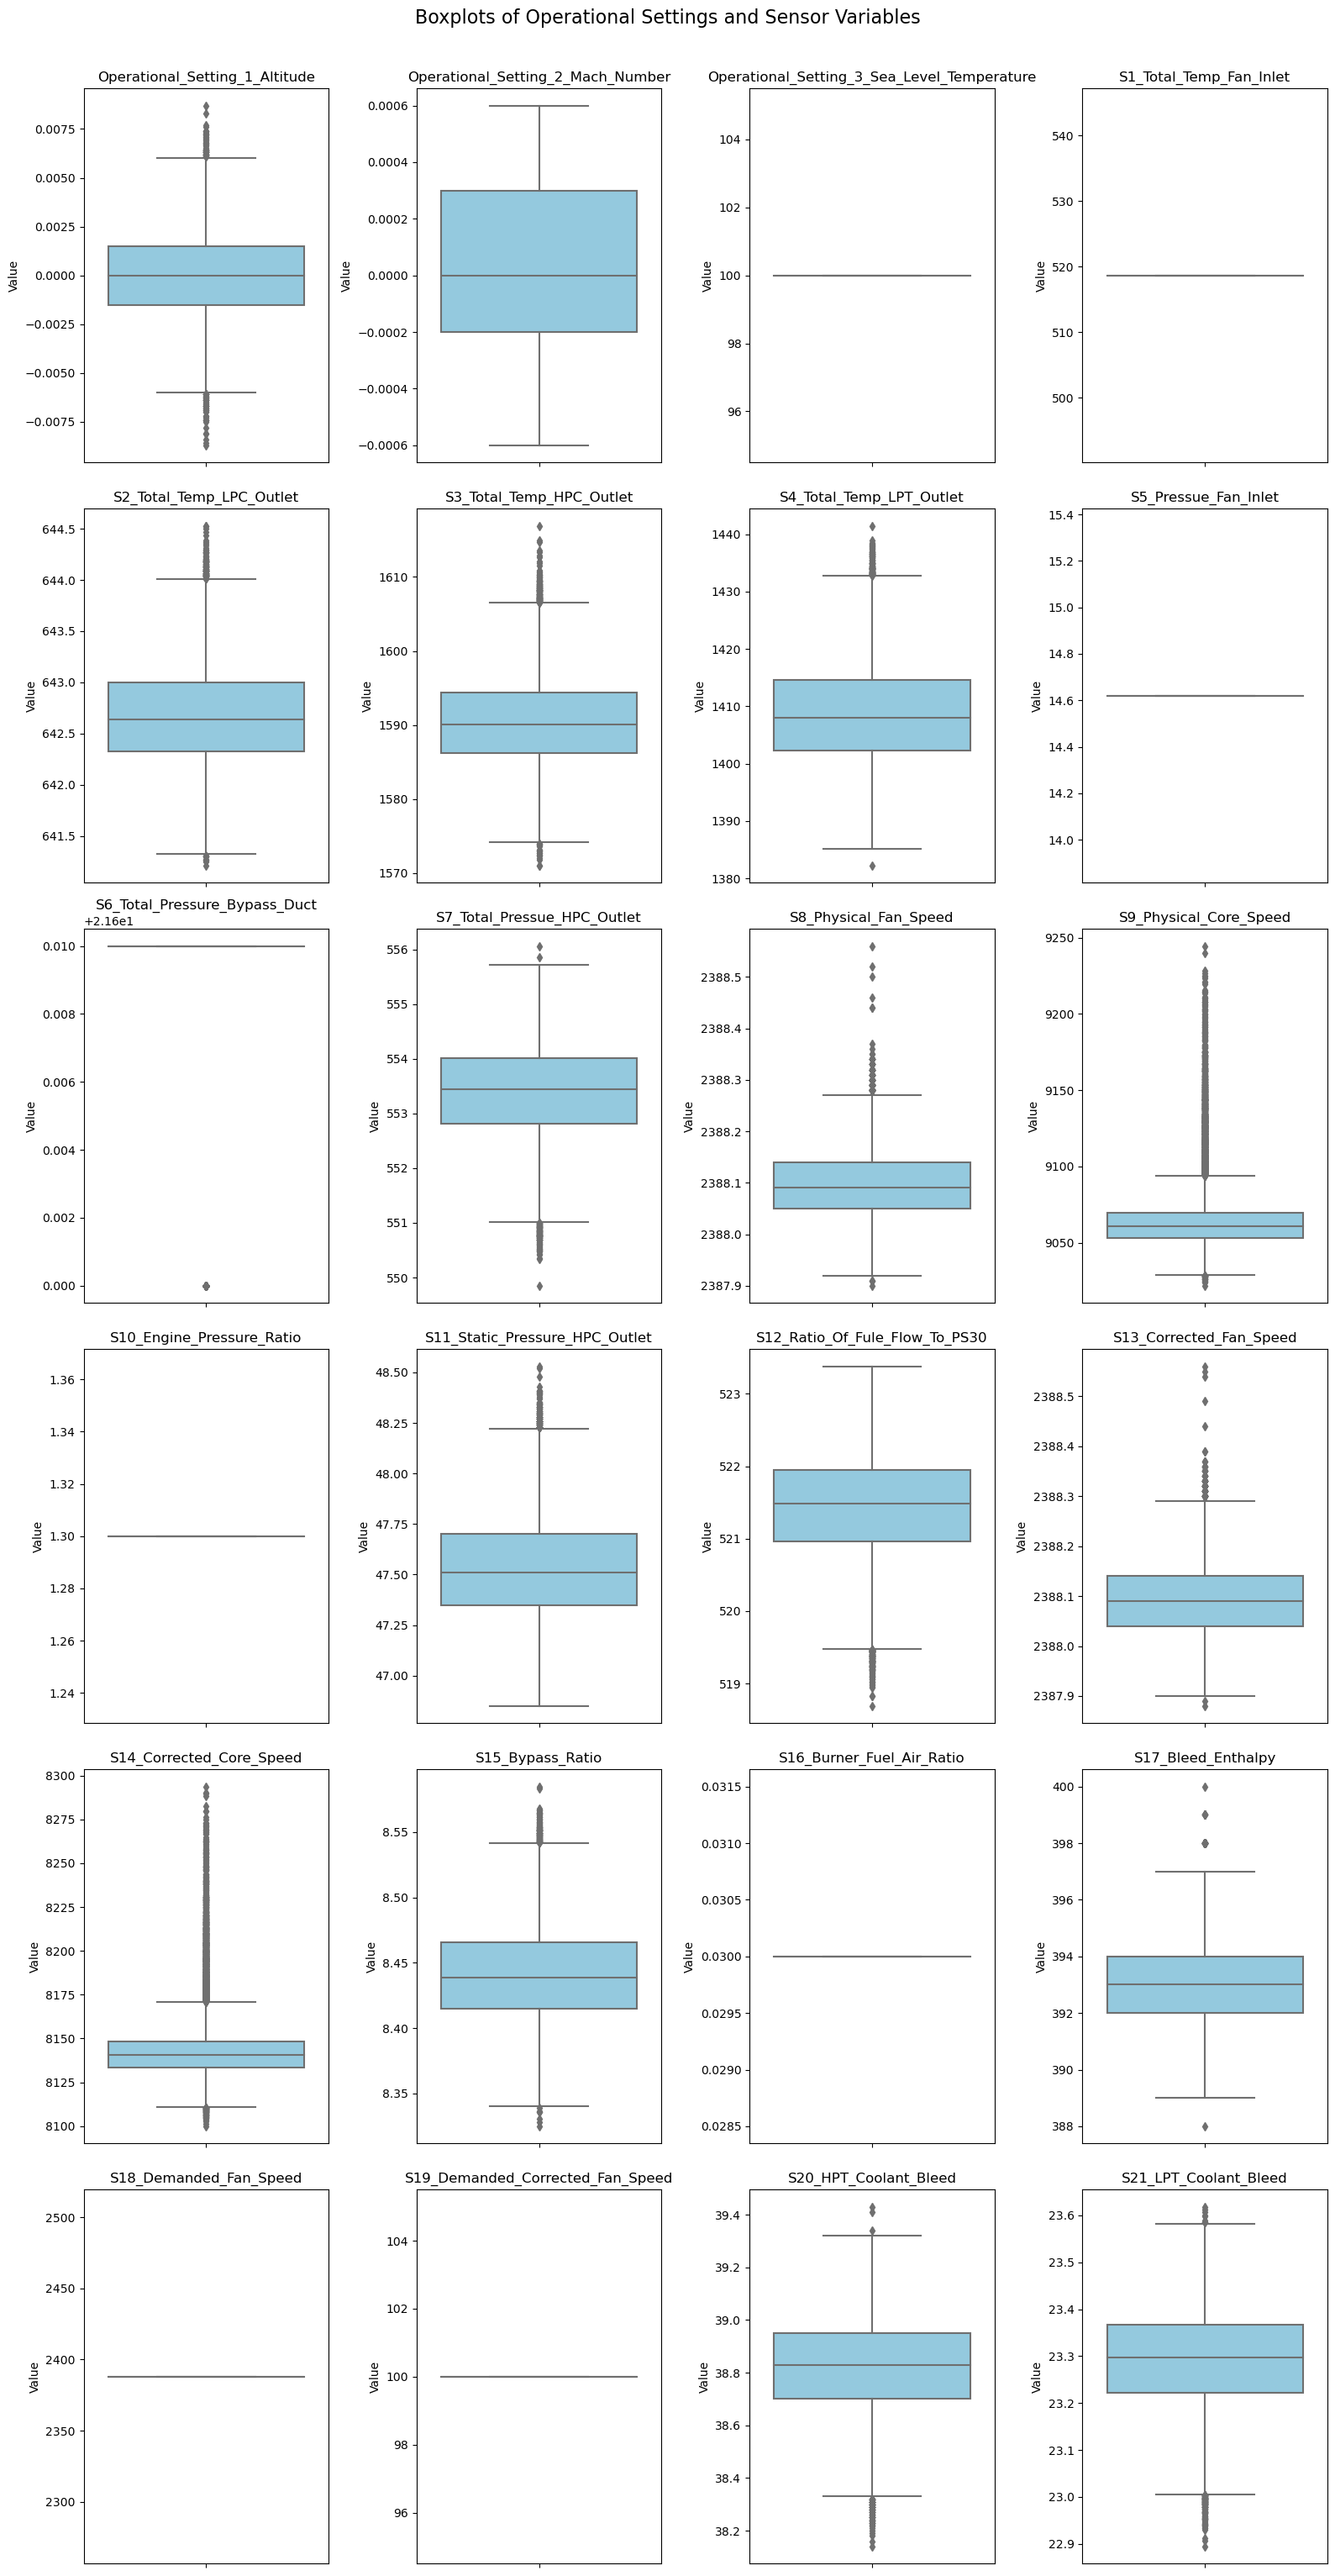

In [31]:
# Building Boxplots for the Operational Settings and Sensor Variables

# Variables to plot
n_cols = 4
n_rows = -(-len(y_vars) // n_cols)  # Ceiling division for rows

# Set figure size dynamically based on the number of plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5 * n_rows))
axes = axes.flatten()

# Create boxplots
for i, var in enumerate(y_vars):
    sns.boxplot(data=df_train, y=var, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{var}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value', fontsize=10)

# Remove unused subplots
for j in range(len(y_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots of Operational Settings and Sensor Variables', fontsize=16, y=1.02)
plt.show()

In [32]:
# Filter data to find outliers in "S9_Physical_Core_Speed" and "S14_Corrected_Core_Speed"
df_train_outliers_s9 = df_train[df_train["S9_Physical_Core_Speed"] > 9100]
df_train_outliers_s14 = df_train[df_train["S14_Corrected_Core_Speed"] > 8175]

# Count the number of outliers found
outliers_counts9 = df_train_outliers_s9.shape[0]
outliers_counts14 = df_train_outliers_s14.shape[0]

print(f"Count of Outliers in 'S9_Physical_Core_Speed': {outliers_counts9}\n"
    f"Count of Outliers in 'S14_Corrected_Core_Speed': {outliers_counts14}")

Count of Outliers in 'S9_Physical_Core_Speed': 1380
Count of Outliers in 'S14_Corrected_Core_Speed': 1272


#### *Infernce: Interpreting Outliers*

During EDA, the following variables were found to exhibit a visually higher presence of outliers:

- **S9_Physical_Core_Speed**: 1380 Outliers
- **S14_Corrected_Core_Speed**: 1272 Outliers
- The decision to retain these outliers is based on their valuable representation of specific engine operating conditions, capturing important variability and irregularities. Removing them would result in significant information loss and reduce the dataset’s authenticity

- While other variables also exhibit outliers, their frequency is lower compared to "S9_Physical_Core_Speed" and "S14_Corrected_Core_Speed"

- For model development, these outliers will be preserved, with an emphasis on using models robust to outlier effects to maintain prediction accuracy

#### v) Visualizing Variables across Different Engines

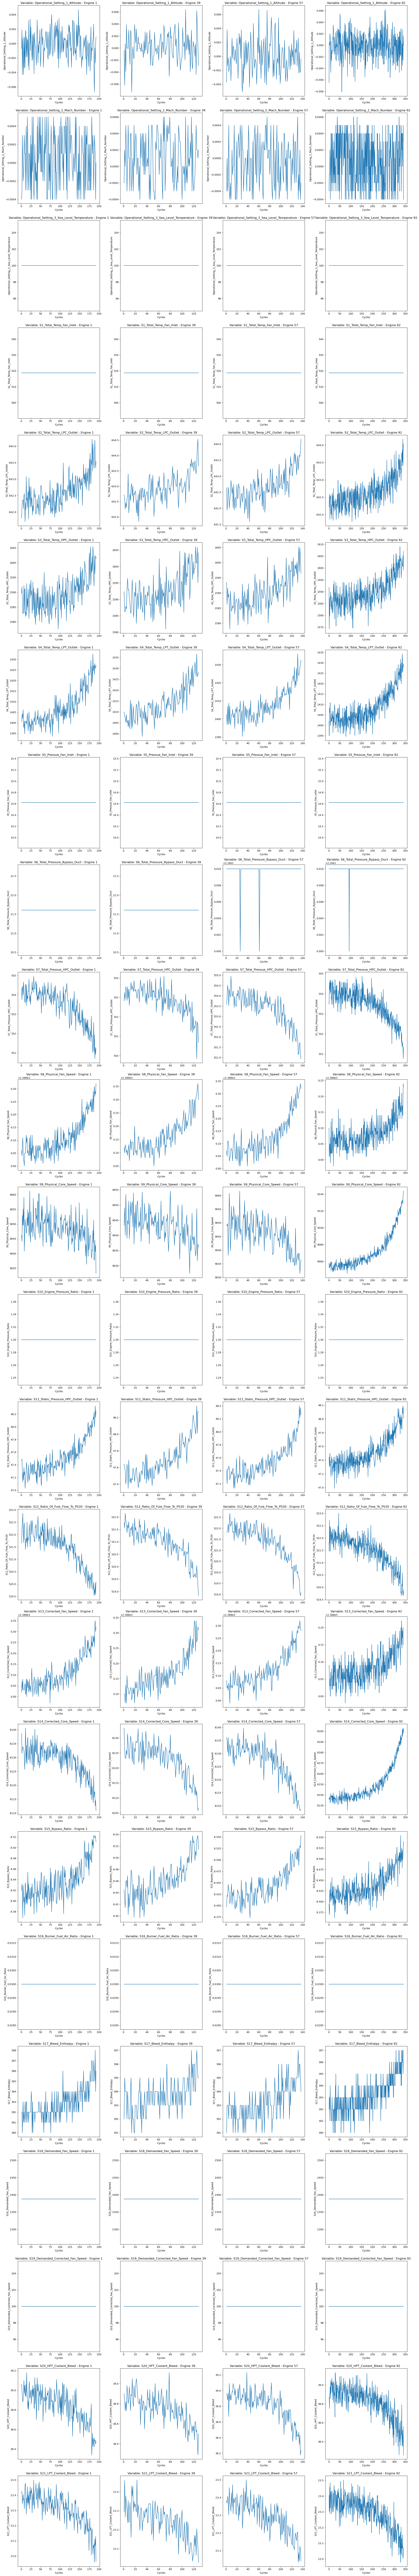

In [33]:
# Selecting engines for visualization

engine_ids = [1, 39, 57, 92]

# Creating subplots for each variable

fig, axes = plt.subplots(len(y_vars), len(engine_ids), figsize = (23, 6 * len(y_vars)))


# Looping through each variable and each engine

for i, var in enumerate(y_vars):
    for j, engine_id in enumerate(engine_ids):
        df_train_engine = df_train[df_train["Engine_ID"] == engine_id]
        
        sns.lineplot(data = df_train_engine, x = 'Cycles', y = var, ax = axes[i, j])
        axes[i, j].set_title(f'Variable: {var} - Engine {engine_id}')
        axes[i, j].set_xlabel('Cycles')
        axes[i, j].set_ylabel(var)

# Adjusting Layout

plt.tight_layout()
plt.show()

#### *Inference: The histogram indicates that the majority of engines fail around 200 cycles. Additionally, the distribution is right-skewed, with only a small number of engines operating beyond 300 cycles.*

#### vi) Building Correlation Plot

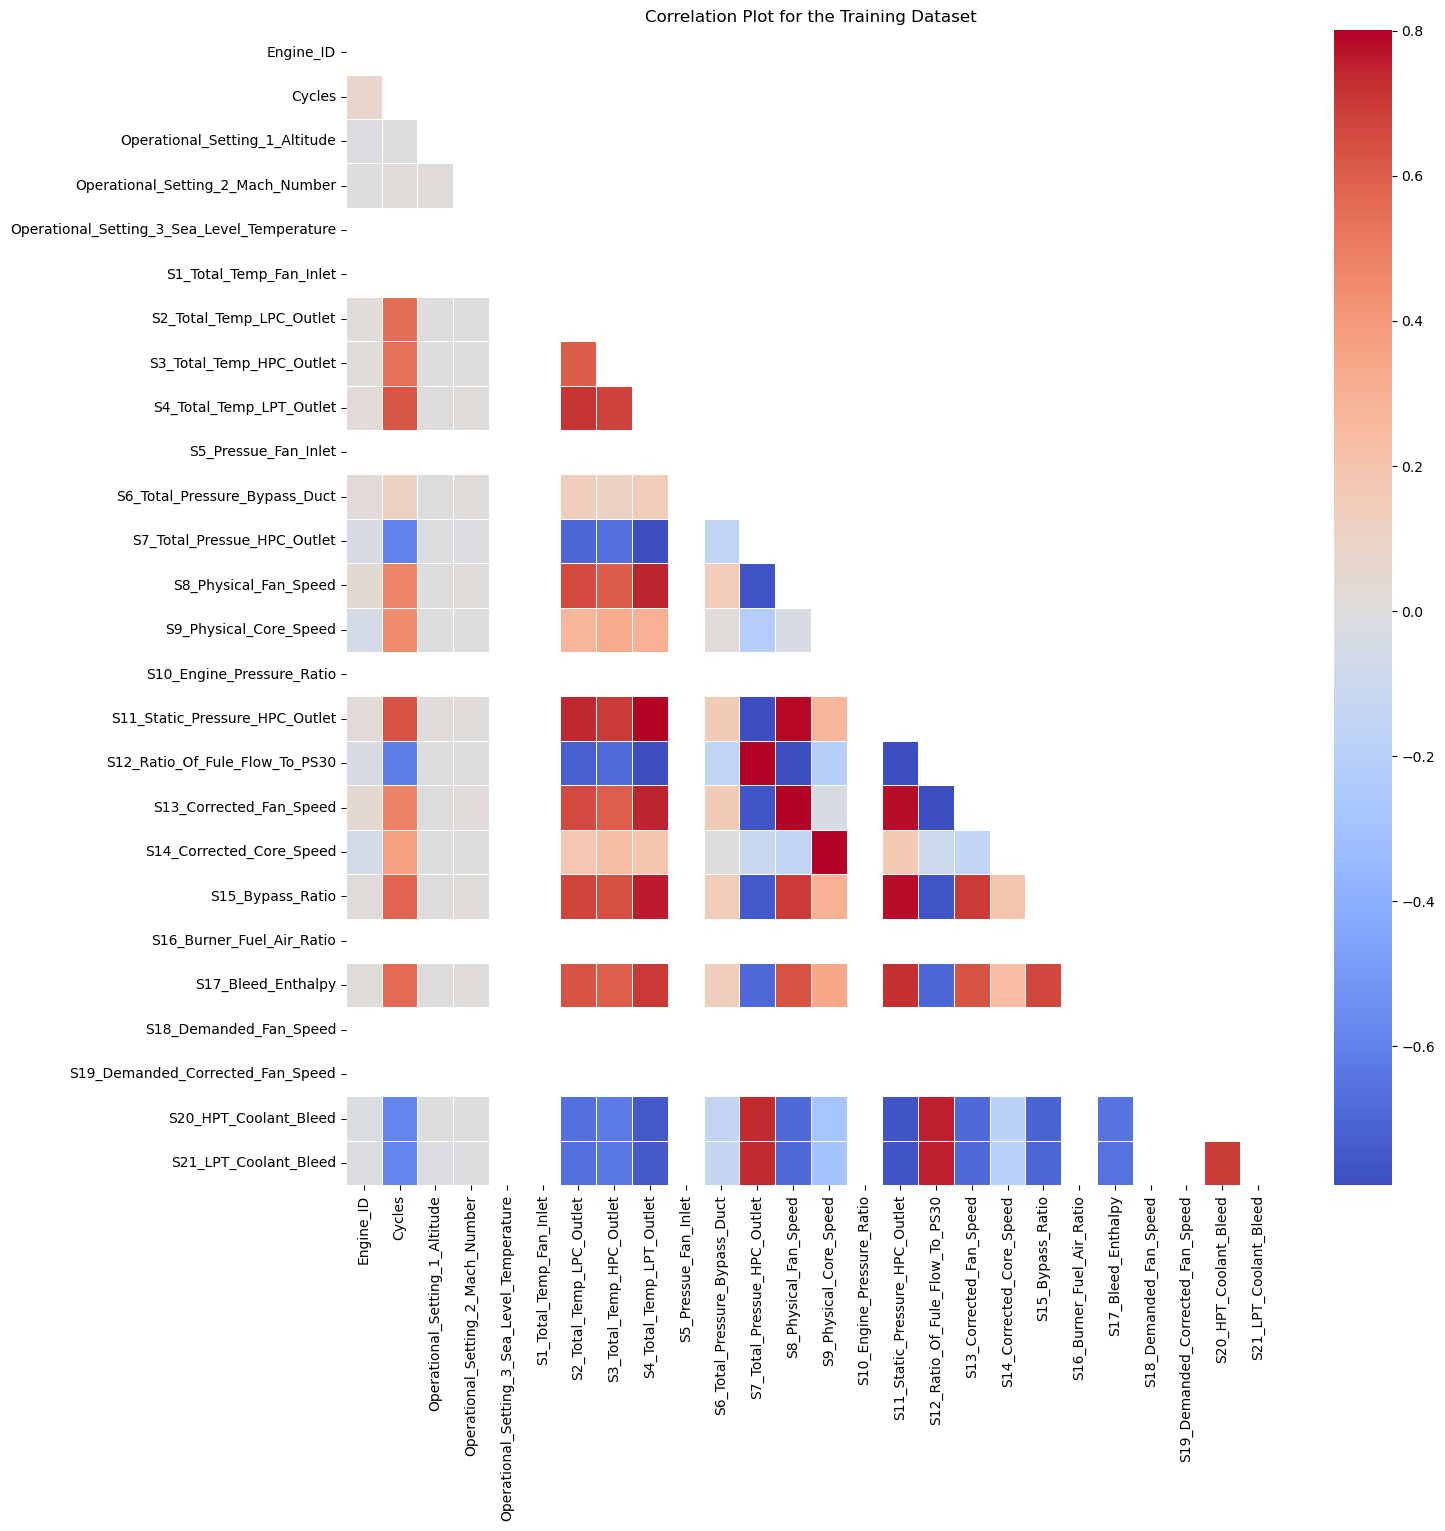

In [34]:
plt.figure(figsize=(15,15))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, robust = True, center = 0, linewidths = .6, cmap="coolwarm")
plt.title("Correlation Plot for the Training Dataset")
plt.show()

#### *Inference: Strongly Correlated Variables*
- Positive Correlation Pairs- ("S8_Physical_Fan_Speed" and "S4_Total_Temp_LPT_Outlet"), ("S11_Static_Pressure_HPC_Outlet" and "S8_Physical_Fan_Speed"), ("S13_Corrected_Fan_Speed" and "S8_Physical_Fan_Speed") etc.
- Negative Correlation Pairs- ("S8_Physical_Fan_Speed" and "S7_Total_Pressue_HPC_Outlet"), ("S12_Ratio_Of_Fule_Flow_To_PS30" and "S11_Static_Pressure_HPC_Outlet"), ("S13_Corrected_Fan_Speed" and "S12_Ratio_Of_Fule_Flow_To_PS30") etc. 

<a id='4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 4: Pre-Processing of the Training, Testing and RUL Datasets </b>

### Training Dataset

In [35]:
# Taking a copy of the Train dataset
df_train_dataset = df_train.copy()

# Creating the "RUL" variable (dependent variable)
df_train_dataset["RUL"] = df_train_dataset.groupby(["Engine_ID"])["Cycles"].transform(max) - df_train_dataset["Cycles"]

In [36]:
# Displaying the top 5 rows of the dataset

df_train_dataset.head()

Engine_ID  Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed  RUL
0          1       1                         -0.0007                            -0.0004                                        100.0                   518.67                    641.82                   1589.70                   1400.60                 14.62                          21.61                       554.36                2388.06                 9046.19                        1.3                           47.47                          521.66                  2388.02                   8138.62            8.4195                       0.03                 392                    2388                             100.0                  39.06                23.4190  191
1          1       2                          0.0019                            -0.0003                                        100.0                   518.67                    642.15                   1591.82                   1403.14                 14.62                          21.61                       553.75                2388.04                 9044.07                        1.3                           47.49                          522.28                  2388.07                   8131.49            8.4318                       0.03                 392                    2388                             100.0                  39.00                23.4236  190
2          1       3                         -0.0043                             0.0003                                        100.0                   518.67                    642.35                   1587.99                   1404.20                 14.62                          21.61                       554.26                2388.08                 9052.94                        1.3                           47.27                          522.42                  2388.03                   8133.23            8.4178                       0.03                 390                    2388                             100.0                  38.95                23.3442  189
3          1       4                          0.0007                             0.0000                                        100.0                   518.67                    642.35                   1582.79                   1401.87                 14.62                          21.61                       554.45                2388.11                 9049.48                        1.3                           47.13                          522.86                  2388.08                   8133.83            8.3682                       0.03                 392                    2388                             100.0                  38.88                23.3739  188
4          1       5                         -0.0019                            -0.0002                                        100.0                   518.67                    642.37                   1582.85                   1406.22                 14.62                          21.61                       554.00                2388.06                 9055.15                        1.3                           47.28                          522.19                  2388.04                   8133.80            8.4294                       0.03                 393                    2388   

### Testing Dataset

In [37]:
# Updating the Test dataset using "engine_life_test" dataset
df_test_dataset = df_test.copy()

In [38]:
# Displaying the first five rows of the Test dataset

df_test_dataset.head()

Engine_ID  Cycles  Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  Operational_Setting_3_Sea_Level_Temperature  S1_Total_Temp_Fan_Inlet  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S5_Pressue_Fan_Inlet  S6_Total_Pressure_Bypass_Duct  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S10_Engine_Pressure_Ratio  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S16_Burner_Fuel_Air_Ratio  S17_Bleed_Enthalpy  S18_Demanded_Fan_Speed  S19_Demanded_Corrected_Fan_Speed  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
0          1       1                          0.0023                             0.0003                                        100.0                   518.67                    643.02                   1585.29                   1398.21                 14.62                          21.61                       553.90                2388.04                 9050.17                        1.3                           47.20                          521.72                  2388.03                   8125.55            8.4052                       0.03                 392                    2388                             100.0                  38.86                23.3735
1          1       2                         -0.0027                            -0.0003                                        100.0                   518.67                    641.71                   1588.45                   1395.42                 14.62                          21.61                       554.85                2388.01                 9054.42                        1.3                           47.50                          522.16                  2388.06                   8139.62            8.3803                       0.03                 393                    2388                             100.0                  39.02                23.3916
2          1       3                          0.0003                             0.0001                                        100.0                   518.67                    642.46                   1586.94                   1401.34                 14.62                          21.61                       554.11                2388.05                 9056.96                        1.3                           47.50                          521.97                  2388.03                   8130.10            8.4441                       0.03                 393                    2388                             100.0                  39.08                23.4166
3          1       4                          0.0042                             0.0000                                        100.0                   518.67                    642.44                   1584.12                   1406.42                 14.62                          21.61                       554.07                2388.03                 9045.29                        1.3                           47.28                          521.38                  2388.05                   8132.90            8.3917                       0.03                 391                    2388                             100.0                  39.00                23.3737
4          1       5                          0.0014                             0.0000                                        100.0                   518.67                    642.51                   1587.19                   1401.92                 14.62                          21.61                       554.16                2388.01                 9044.55                        1.3                           47.31                          522.15                  2388.03                   8129.54            8.4031                       0.03                 390                    2388                            

<a id='5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 5: Splitting the Data into Training Set and Test Set </b>

#### Here, we will split the data into the follwing two sets on the basis of 70:30 split of data-
- Training Set: We will rescale our data and construct our model using a dataset that comprises 70% of the values from the original dataset
- Test Set: After constructing our model, we will evaluate its performance using a dataset consisting of the remaining 30% of values

In [39]:
# Checking data type of the columns from the Train dataset

df_train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Engine_ID                                    20631 non-null  int64  
 1   Cycles                                       20631 non-null  int64  
 2   Operational_Setting_1_Altitude               20631 non-null  float64
 3   Operational_Setting_2_Mach_Number            20631 non-null  float64
 4   Operational_Setting_3_Sea_Level_Temperature  20631 non-null  float64
 5   S1_Total_Temp_Fan_Inlet                      20631 non-null  float64
 6   S2_Total_Temp_LPC_Outlet                     20631 non-null  float64
 7   S3_Total_Temp_HPC_Outlet                     20631 non-null  float64
 8   S4_Total_Temp_LPT_Outlet                     20631 non-null  float64
 9   S5_Pressue_Fan_Inlet                         20631 non-null  float64
 10

#### *Inference: As there are no categorical variables, we don't have to creat dummy variables.*

In [40]:
# Columns to drop from the "Train" dataset

cols_to_drop = ["Engine_ID", "Cycles", "Operational_Setting_3_Sea_Level_Temperature", 
                "S1_Total_Temp_Fan_Inlet", "S5_Pressue_Fan_Inlet", "S6_Total_Pressure_Bypass_Duct", 
                "S10_Engine_Pressure_Ratio", "S16_Burner_Fuel_Air_Ratio", "S18_Demanded_Fan_Speed", 
                "S19_Demanded_Corrected_Fan_Speed", "RUL"]

# Dependent Variables
X = df_train_dataset.drop(cols_to_drop, axis =1)

# Independent Variable
y = df_train_dataset["RUL"]

In [41]:
# Displaying the first five rows of the Dependent Variables

X.head()

Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S17_Bleed_Enthalpy  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
0                         -0.0007                            -0.0004                    641.82                   1589.70                   1400.60                       554.36                2388.06                 9046.19                           47.47                          521.66                  2388.02                   8138.62            8.4195                 392                  39.06                23.4190
1                          0.0019                            -0.0003                    642.15                   1591.82                   1403.14                       553.75                2388.04                 9044.07                           47.49                          522.28                  2388.07                   8131.49            8.4318                 392                  39.00                23.4236
2                         -0.0043                             0.0003                    642.35                   1587.99                   1404.20                       554.26                2388.08                 9052.94                           47.27                          522.42                  2388.03                   8133.23            8.4178                 390                  38.95                23.3442
3                          0.0007                             0.0000                    642.35                   1582.79                   1401.87                       554.45                2388.11                 9049.48                           47.13                          522.86                  2388.08                   8133.83            8.3682                 392                  38.88                23.3739
4                         -0.0019                            -0.0002                    642.37                   1582.85                   1406.22                       554.00                2388.06                 9055.15                           47.28                          522.19                  2388.04                   8133.80            8.4294                 393                  38.90                23.4044

#### Splitting the Dataset into Train and Validation Sets

In [42]:
# Creating Train and Validation Datasets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 16)

print("X Training Shape:", X_train.shape)
print("y Training Shape:", y_train.shape)
print("X Validation Shape:", X_val.shape)
print("y Validation Shape:", y_val.shape)

X Training Shape: (14441, 16)
y Training Shape: (14441,)
X Validation Shape: (6190, 16)
y Validation Shape: (6190,)


#### Preparing Testing Dataset

In [43]:
# Columns to drop from the "Train" dataset

cols_to_drop_filtered = ["Engine_ID", "Cycles", "Operational_Setting_3_Sea_Level_Temperature", 
                         "S1_Total_Temp_Fan_Inlet", "S5_Pressue_Fan_Inlet", "S6_Total_Pressure_Bypass_Duct", 
                         "S10_Engine_Pressure_Ratio", "S16_Burner_Fuel_Air_Ratio", "S18_Demanded_Fan_Speed", 
                         "S19_Demanded_Corrected_Fan_Speed"]

X_test = df_test_dataset.groupby('Engine_ID').last().reset_index().copy()
X_test = X_test.drop(cols_to_drop_filtered, axis =1)
y_test = df_rul['RUL']

In [44]:
# Displaying the first five rows of the X_test Dataset

X_test.head()

Operational_Setting_1_Altitude  Operational_Setting_2_Mach_Number  S2_Total_Temp_LPC_Outlet  S3_Total_Temp_HPC_Outlet  S4_Total_Temp_LPT_Outlet  S7_Total_Pressue_HPC_Outlet  S8_Physical_Fan_Speed  S9_Physical_Core_Speed  S11_Static_Pressure_HPC_Outlet  S12_Ratio_Of_Fule_Flow_To_PS30  S13_Corrected_Fan_Speed  S14_Corrected_Core_Speed  S15_Bypass_Ratio  S17_Bleed_Enthalpy  S20_HPT_Coolant_Bleed  S21_LPT_Coolant_Bleed
0                         -0.0006                             0.0004                    642.58                   1581.22                   1398.91                       554.42                2388.08                 9056.40                           47.23                          521.79                  2388.06                   8130.11            8.4024                 393                  38.81                23.3552
1                          0.0018                            -0.0001                    642.55                   1586.59                   1410.83                       553.52                2388.10                 9044.77                           47.67                          521.74                  2388.09                   8126.90            8.4505                 391                  38.81                23.2618
2                         -0.0016                             0.0004                    642.88                   1589.75                   1418.89                       552.59                2388.16                 9049.26                           47.88                          520.83                  2388.14                   8131.46            8.4119                 395                  38.93                23.2740
3                          0.0012                             0.0004                    642.78                   1594.53                   1406.88                       552.64                2388.13                 9051.30                           47.65                          521.88                  2388.11                   8133.64            8.4634                 395                  38.58                23.2581
4                         -0.0013                            -0.0004                    642.27                   1589.94                   1419.36                       553.29                2388.10                 9053.99                           47.46                          521.00                  2388.15                   8125.74            8.4362                 394                  38.75                23.4117

In [45]:
# Displaying the first five rows of the y_test dataset

y_test.head()

0    112
1     98
2     69
3     82
4     91
Name: RUL, dtype: int64

<a id='6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 6: Data Pre-Processing Steps </b>

###  Normalizing Feature Data for Consistent Scaling

In [46]:
# Instantiating the MinMaxScaler object to be used for normalizing
scaler = MinMaxScaler()

# Fit the scaler to the Training dataset
X_train_scaled = scaler.fit_transform(X_train)

# Transform the Test and Validation datasets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### Dimensionality Reduction with Kernel Principal Component Analysis (KPCA)

- To better understand the complex relationships between engine variables and cycle count, we analyze a dataset characterized by non-linear interactions, particularly evident when examining four representative engines out of a set of 100

- Given this complexity, we employ Kernel Principal Component Analysis (KPCA) for dimensionality reduction. Unlike linear methods, KPCA is well-suited to capturing the non-linear dependencies within the data which enables us to uncover hidden patterns and latent structures

- By leveraging KPCA, we aim to gain deeper insights into the intricate interplay between variables and engine cycles that traditional linear techniques might overlook

In [47]:
# Specify the number of components for KPCA
n_components = 5

# Create KPCA transformer
kpca = KernelPCA(n_components = n_components, kernel = 'poly', random_state = 16)

# Fit and transform the Training dataset
X_train_kpca = kpca.fit_transform(X_train_scaled)

# Transform the Validation and Test datasets
X_val_kpca = kpca.transform(X_val_scaled)
X_test_kpca = kpca.transform(X_test_scaled)

In [48]:
X_train_kpca
X_val_kpca 
X_test_kpca

array([[-1.84323392e-01,  1.70520378e-01, -2.95019035e-02,
        -2.25062971e-02, -6.43815039e-02],
       [-4.14033011e-02, -4.44479491e-02, -7.13611403e-02,
         5.64448479e-02, -3.67002678e-02],
       [ 1.24636602e-01,  1.73353752e-01, -7.71578956e-02,
        -4.69971521e-02, -3.46721580e-03],
       [ 1.01107731e-01,  1.75306698e-01, -2.62736410e-02,
         3.36155463e-02,  8.55312786e-03],
       [-1.07227472e-03, -1.74178654e-01, -6.60585128e-02,
        -3.37584129e-02,  1.44076196e-02],
       [-3.29732645e-02, -1.21441110e-01, -3.32421578e-02,
         2.45495962e-01,  2.74668774e-03],
       [-1.22903698e-01, -4.20688738e-02,  4.02378361e-02,
         4.62732865e-02, -1.01860367e-02],
       [ 7.72308514e-02, -2.18252613e-01, -7.16837997e-02,
         4.85004339e-02, -1.03965359e-02],
       [-8.99334059e-03,  1.72524890e-01, -5.62320717e-02,
        -1.43780322e-02,  3.88462991e-02],
       [-3.02246678e-02,  1.67824794e-01, -1.44611806e-02,
        -5.85094575e-02

<a id='7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Step 7: Model Building </b>

In [49]:
# Defining a function to evaluate the RMSE, MSE, MAE and R² Score for models

def model_evaluation_ml(model, X_train, y_train, X_val, y_val, X_test, y_test, model_name="Model"):
   
    datasets = {
        "Training": (X_train, y_train),
        "Validation": (X_val, y_val),
        "Test": (X_test, y_test)
    }

    print(f"{model_name} Model Metrics:")
    
    for name, (X_data, y_true) in datasets.items():
        y_pred = model.predict(X_data)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f"\n{name} Metrics ----->>")        
        print(f"Root Mean Squared Error ({name}): {rmse:.5f}")
        print(f"Mean Squared Error ({name}): {mse:.5f}")
        print(f"Mean Absolute Error ({name}): {mae:.5f}")
        print(f"R² Score ({name}): {r2:.5f}")
        print("-" * 50) # Separator for clarity

In [50]:
def plot_prediction_outputs(y_test, y_predictions, train, model_name):
    
    plt.style.use('seaborn-white')
    plt.rcParams['figure.figsize']=20,5
    fig,ax = plt.subplots()
    plt.title('Actual vs Predicted Values: ' + model_name + " Model", fontsize =16)
    plt.ylabel('RUL',fontsize =16)
    plt.xlabel('Test Engine IDs',fontsize =16)
    g = sns.lineplot(x = np.arange(0, len(train['Engine_ID'].unique())), y = y_test, color = '#1f77b4', label = 'Actual Values', ax=ax)
    f = sns.lineplot(x = np.arange(0, len(train['Engine_ID'].unique())), y = y_predictions, color = '#ff7f0e', label = 'Predicted Values', ax=ax)
    ax.grid(True)
    ax.legend()
    plt.show()

<a id='7.A'></a>
### A. Machine Learning Models

<a id='7.1'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 1: Simple Linear Regression (SLR) </b>

In [51]:
# Start timing the model training
start_time_slr = time.time()

# Create and train the Linear Regression (LR) model
slr_model = LinearRegression()
slr_model.fit(X_train_kpca, y_train)

# End timing
end_time_slr = time.time()
training_time_slr = end_time_slr - start_time_slr

print(f"Time taken to build the Simple Linear Regression (SLR) model: {training_time_slr:.5f} seconds\n")

# Evaluating SLR model
model_evaluation_ml(slr_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "Simple Linear Regression (SLR)")

Time taken to build the Simple Linear Regression (SLR) model: 0.01384 seconds

Simple Linear Regression (SLR) Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 44.82105
Mean Squared Error (Training): 2008.92673
Mean Absolute Error (Training): 34.42510
R² Score (Training): 0.57341
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 45.77371
Mean Squared Error (Validation): 2095.23244
Mean Absolute Error (Validation): 34.85539
R² Score (Validation): 0.56584
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 31.47757
Mean Squared Error (Test): 990.83770
Mean Absolute Error (Test): 25.44271
R² Score (Test): 0.42622
--------------------------------------------------


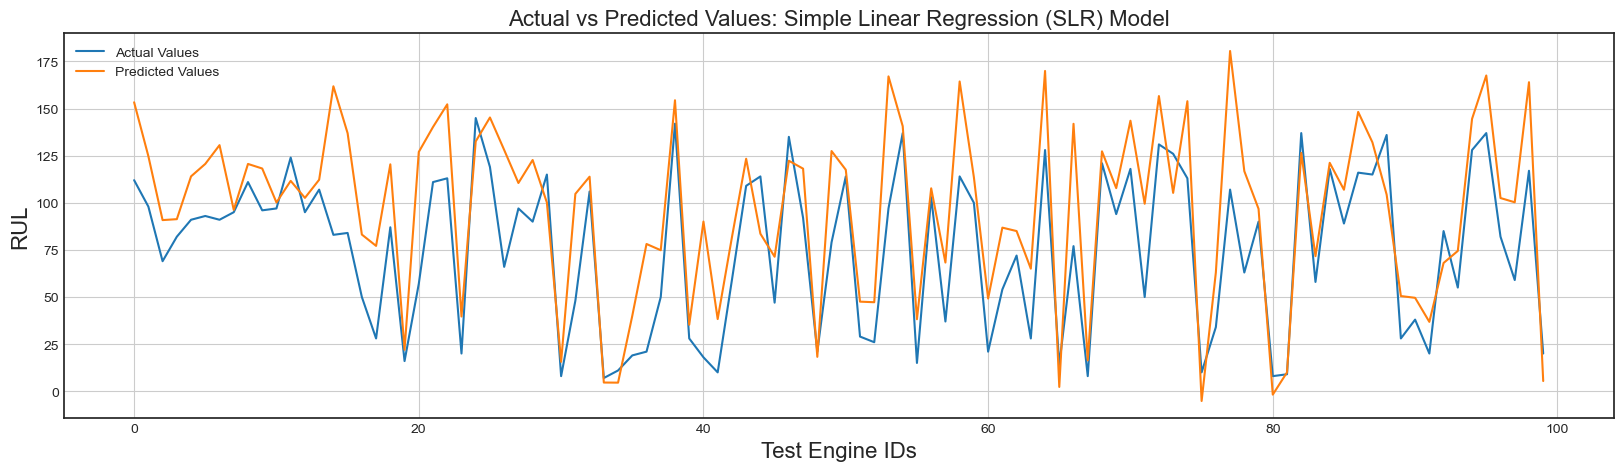

In [52]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "Simple Linear Regression (SLR)"

# Predicting using the selected model
y_test_pred = slr_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.2'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 2: Support Vector Regression (SVR) Model </b>

In [53]:
# Start timing the model training
start_time_svr = time.time()

# Create and train the Support Vector Regression (SVR) Model
svr_model = SVR()
svr_model.fit(X_train_kpca, y_train)
end_time_svr = time.time()
training_time_svr = end_time_svr - start_time_svr


print(f"Time taken to build the Support Vector Regression (SVR) model: {training_time_svr:.5f} seconds\n")


# Evaluating SVR model
model_evaluation_ml(svr_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "Support Vector Regression (SVR)")

Time taken to build the Support Vector Regression (SVR) model: 34.48808 seconds

Support Vector Regression (SVR) Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 42.82842
Mean Squared Error (Training): 1834.27387
Mean Absolute Error (Training): 29.96772
R² Score (Training): 0.61050
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 43.67875
Mean Squared Error (Validation): 1907.83282
Mean Absolute Error (Validation): 30.26028
R² Score (Validation): 0.60467
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 25.82822
Mean Squared Error (Test): 667.09686
Mean Absolute Error (Test): 18.23361
R² Score (Test): 0.61370
--------------------------------------------------


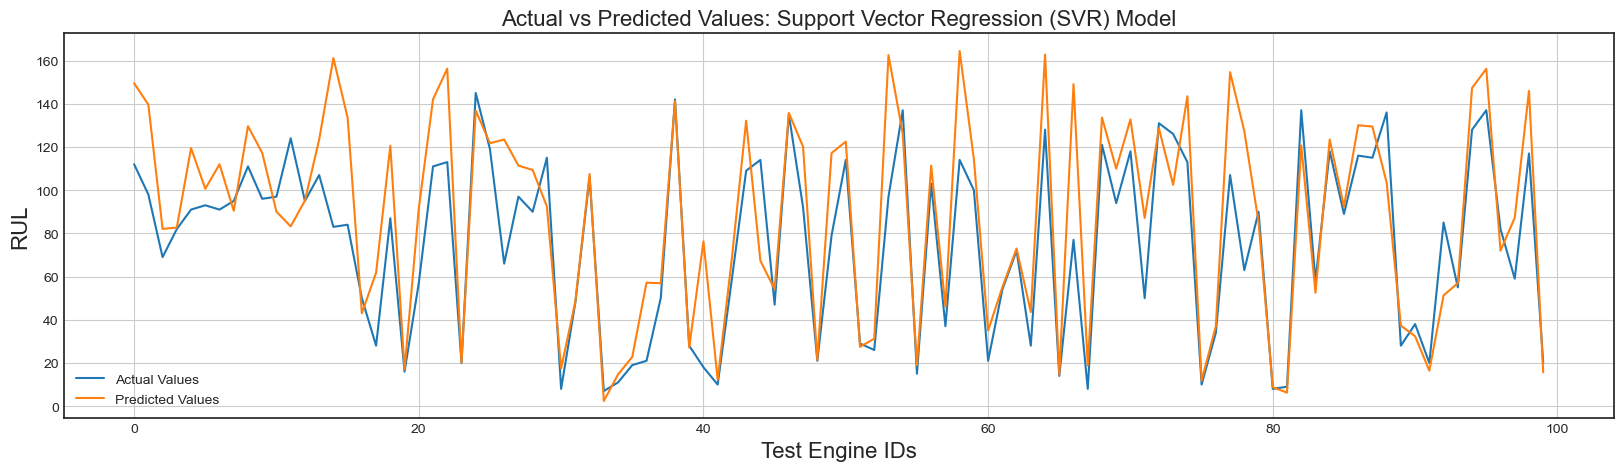

In [54]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "Support Vector Regression (SVR)"

# Predicting using the selected model
y_test_pred = svr_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.3'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 3: Decision Tree Regression (DT) Model </b>

In [55]:
# Start timing the model training
start_time_dt = time.time()

# Create and train the Decision Tree Regression (DT) Model
dt_model = DecisionTreeRegressor(random_state = 16)
dt_model.fit(X_train_kpca, y_train)
end_time_dt = time.time()
training_time_dt = end_time_dt - start_time_dt


print(f"Time taken to build the Decision Tree Regression (DT) model: {training_time_dt:.5f} seconds\n")


# Evaluating DT model
model_evaluation_ml(dt_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "Decision Tree Regression (DT)")

Time taken to build the Decision Tree Regression (DT) model: 0.39716 seconds

Decision Tree Regression (DT) Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 0.00000
Mean Squared Error (Training): 0.00000
Mean Absolute Error (Training): 0.00000
R² Score (Training): 1.00000
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 59.74440
Mean Squared Error (Validation): 3569.39321
Mean Absolute Error (Validation): 41.63425
R² Score (Validation): 0.26038
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 47.56154
Mean Squared Error (Test): 2262.10000
Mean Absolute Error (Test): 34.34000
R² Score (Test): -0.30994
--------------------------------------------------


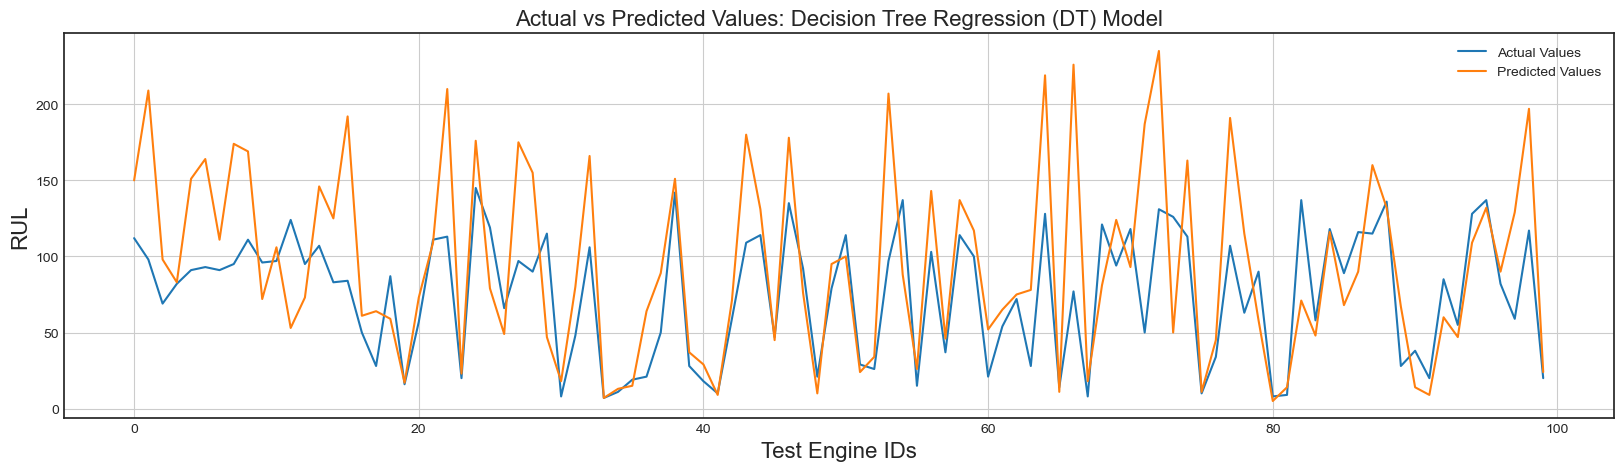

In [56]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "Decision Tree Regression (DT)"

# Predicting using the selected model
y_test_pred = dt_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.4'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 4: Gradient Boosting Regression (GBR) Model </b>

In [57]:
# Start timing the model training
start_time_gb = time.time()

# Create and train the Gradient Boosting Regression (GBR) Model
gb_model = GradientBoostingRegressor(random_state = 16)
gb_model.fit(X_train_kpca, y_train)
end_time_gb = time.time()
training_time_gb = end_time_gb - start_time_gb


print(f"Time taken to build the Gradient Boosting Regression (GBR) model: {training_time_gb:.5f} seconds\n")


# Evaluating GBR model
model_evaluation_ml(gb_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "Gradient Boosting Regression (GBR)")

Time taken to build the Gradient Boosting Regression (GBR) model: 13.80399 seconds

Gradient Boosting Regression (GBR) Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 40.37382
Mean Squared Error (Training): 1630.04524
Mean Absolute Error (Training): 28.77394
R² Score (Training): 0.65386
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 42.23841
Mean Squared Error (Validation): 1784.08345
Mean Absolute Error (Validation): 29.75984
R² Score (Validation): 0.63032
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 30.27101
Mean Squared Error (Test): 916.33389
Mean Absolute Error (Test): 21.82145
R² Score (Test): 0.46937
--------------------------------------------------


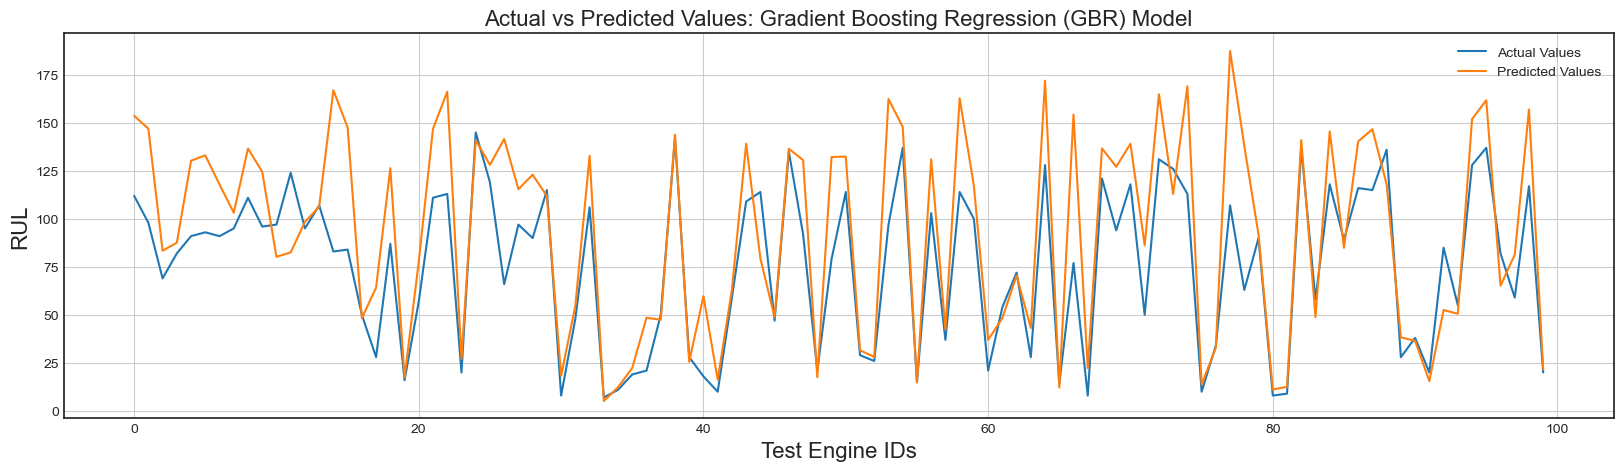

In [58]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "Gradient Boosting Regression (GBR)"

# Predicting using the selected model
y_test_pred = gb_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.5'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 5: LightGBM Regression Model </b>

In [59]:
# Start timing the model training
start_time = time.time()

# Create and train the LightGBM regression model
lgb_reg = lgb.LGBMRegressor(
    learning_rate = 0.01, 
    n_estimators = 5000, 
    num_leaves = 100, 
    objective = "regression", 
    random_state = 16, 
    n_jobs = -1, 
    verbose = -1
)

lgb_reg.fit(X_train_kpca, y_train)

# End timing
end_time = time.time()
training_time = end_time - start_time

print(f"Time taken to build the LightGBM regression model: {training_time:.5f} seconds\n")

# Evaluating LightGBM Regression model
model_evaluation_ml(lgb_reg, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "LightGBM Regression")

Time taken to build the LightGBM regression model: 246.53693 seconds

LightGBM Regression Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 14.41500
Mean Squared Error (Training): 207.79229
Mean Absolute Error (Training): 10.32193
R² Score (Training): 0.95588
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 44.82208
Mean Squared Error (Validation): 2009.01908
Mean Absolute Error (Validation): 31.65766
R² Score (Validation): 0.58371
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 34.57095
Mean Squared Error (Test): 1195.15032
Mean Absolute Error (Test): 24.22060
R² Score (Test): 0.30791
--------------------------------------------------


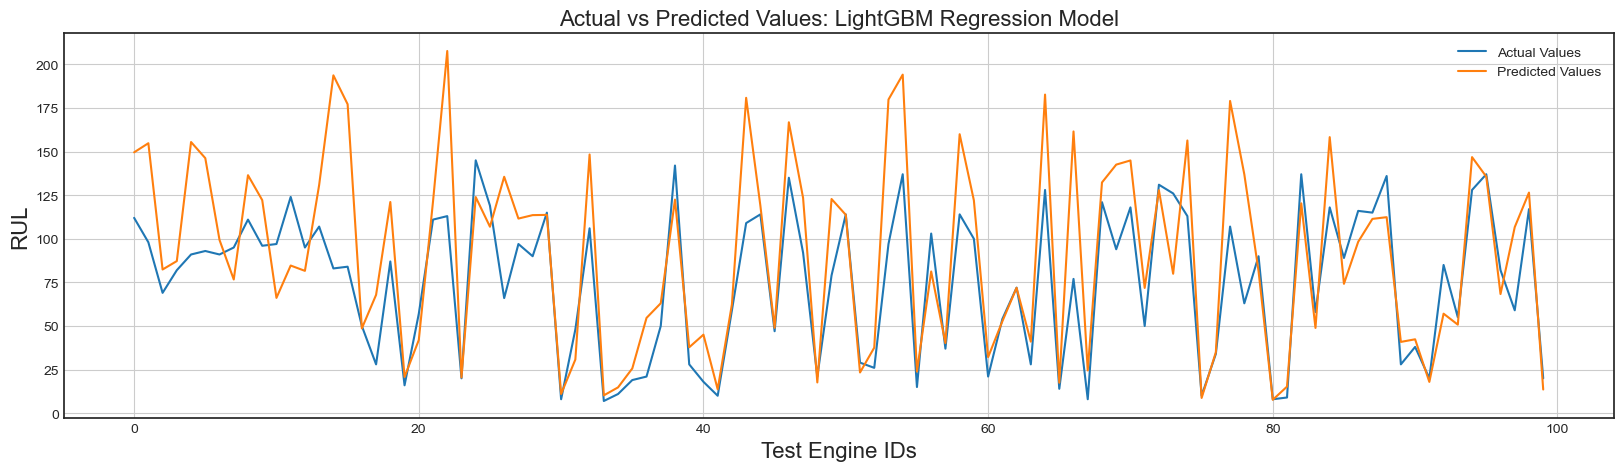

In [60]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "LightGBM Regression"

# Predicting using the selected model
y_test_pred = lgb_reg.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.6'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 6: AdaBoost Regression Model </b>

In [61]:
# Start timing the model training
start_time_ab = time.time()

# Create and train the AdaBoost Regression Model
ab_model = AdaBoostRegressor(random_state = 16)
ab_model.fit(X_train_kpca, y_train)
end_time_ab = time.time()
training_time_ab = end_time_ab - start_time_ab


print(f"Time taken to build the AdaBoost Regression model: {training_time_ab:.5f} seconds\n")


# Evaluating AdaBoost model
model_evaluation_ml(ab_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "AdaBoost Regression")

Time taken to build the AdaBoost Regression model: 1.11854 seconds

AdaBoost Regression Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 45.28356
Mean Squared Error (Training): 2050.60115
Mean Absolute Error (Training): 34.47888
R² Score (Training): 0.56456
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 46.00071
Mean Squared Error (Validation): 2116.06499
Mean Absolute Error (Validation): 34.88385
R² Score (Validation): 0.56153
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 40.78551
Mean Squared Error (Test): 1663.45780
Mean Absolute Error (Test): 31.08355
R² Score (Test): 0.03672
--------------------------------------------------


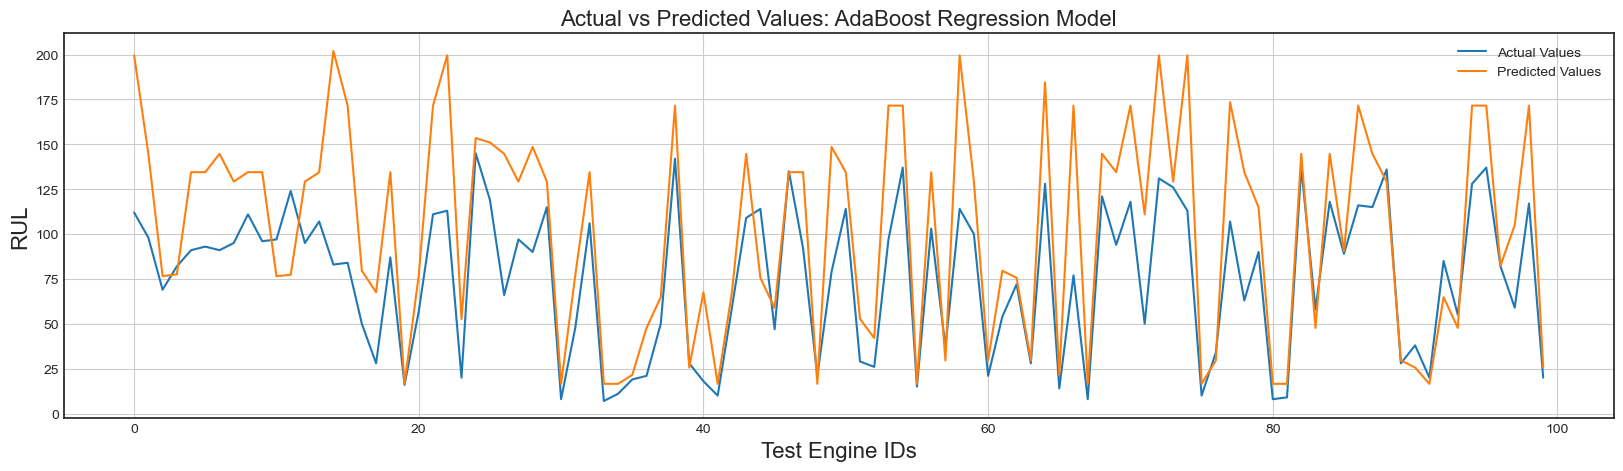

In [62]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "AdaBoost Regression"

# Predicting using the selected model
y_test_pred = ab_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.7'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 7: XGBoost Regression Model </b>

In [63]:
# Start timing the model training
start_time_xgb = time.time()

# Create and train the XGBoost Regression Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state = 16, n_jobs = -1)
xgb_model.fit(X_train_kpca, y_train)
end_time_xgb = time.time()
training_time_xgb = end_time_xgb - start_time_xgb


print(f"Time taken to build the XGBoost Regression model: {training_time_xgb:.5f} seconds\n")


# Evaluating XGBoost model
model_evaluation_ml(xgb_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "XGBoost Regression")

Time taken to build the XGBoost Regression model: 1.65913 seconds

XGBoost Regression Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 29.16868
Mean Squared Error (Training): 850.81199
Mean Absolute Error (Training): 20.64623
R² Score (Training): 0.81933
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 43.88802
Mean Squared Error (Validation): 1926.15795
Mean Absolute Error (Validation): 31.11521
R² Score (Validation): 0.60088
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 33.80409
Mean Squared Error (Test): 1142.71680
Mean Absolute Error (Test): 23.47611
R² Score (Test): 0.33827
--------------------------------------------------


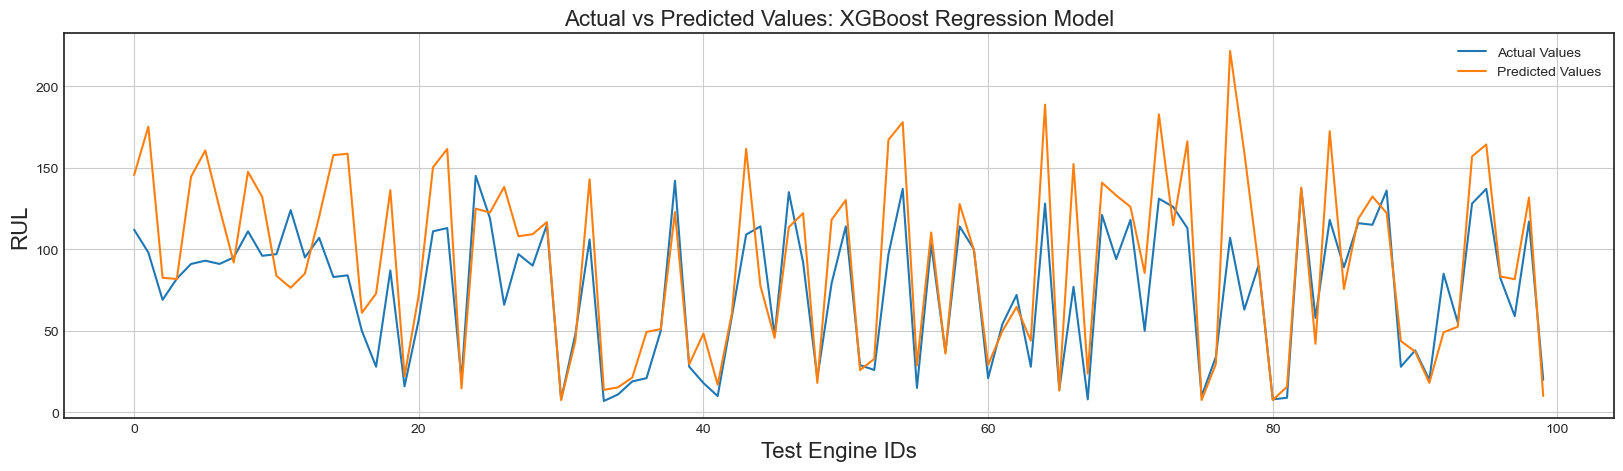

In [64]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "XGBoost Regression"

# Predicting using the selected model
y_test_pred = xgb_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 8: Random Forest Model </b>

In [65]:
# Start timing the model training
start_time_rf = time.time()

# Create and train the Random Forest Model
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 16, n_jobs = -1)
rf_model.fit(X_train_kpca, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf


print(f"Time taken to build the Random Forest model: {training_time_dt:.5f} seconds\n")


# Evaluating RF model
model_evaluation_ml(rf_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "Random Forest")

Time taken to build the Random Forest model: 0.39716 seconds

Random Forest Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 15.94192
Mean Squared Error (Training): 254.14475
Mean Absolute Error (Training): 11.19769
R² Score (Training): 0.94603
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 43.22112
Mean Squared Error (Validation): 1868.06519
Mean Absolute Error (Validation): 30.35631
R² Score (Validation): 0.61291
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 33.44244
Mean Squared Error (Test): 1118.39708
Mean Absolute Error (Test): 24.26590
R² Score (Test): 0.35236
--------------------------------------------------


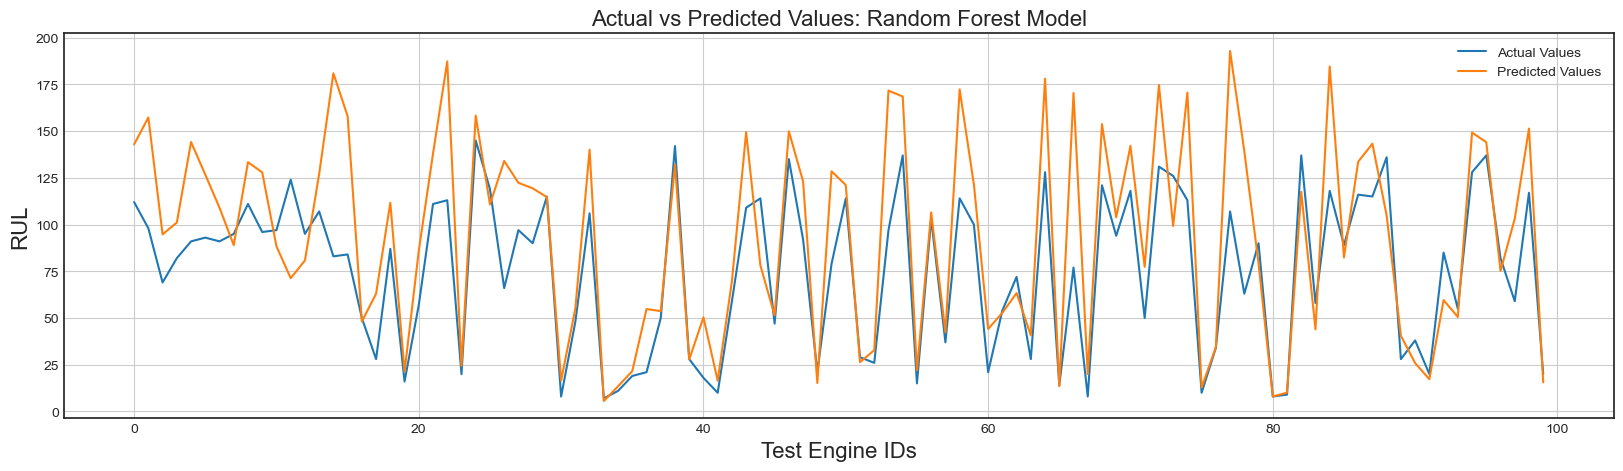

In [66]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "Random Forest"

# Predicting using the selected model
y_test_pred = rf_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.9'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 9: k-Nearest Neighbors (KNN) Regression Model </b>

In [67]:
# Start timing the model training
start_time_knn = time.time()

# Create and train the k-Nearest Neighbors Regression (KNN) model
knn_model = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_model.fit(X_train_kpca, y_train)

# End timing
end_time_knn = time.time()
training_time_knn = end_time_knn - start_time_knn

print(f"Time taken to build the k-Nearest Neighbors Regression (KNN) model: {training_time_knn:.5f} seconds\n")

# Evaluating KNN model
model_evaluation_ml(knn_model, X_train_kpca, y_train, X_val_kpca, y_val, X_test_kpca, y_test, "k-Nearest Neighbors Regression (KNN)")

Time taken to build the k-Nearest Neighbors Regression (KNN) model: 0.03837 seconds

k-Nearest Neighbors Regression (KNN) Model Metrics:

Training Metrics ----->>
Root Mean Squared Error (Training): 37.04060
Mean Squared Error (Training): 1372.00569
Mean Absolute Error (Training): 26.41037
R² Score (Training): 0.70866
--------------------------------------------------

Validation Metrics ----->>
Root Mean Squared Error (Validation): 46.36951
Mean Squared Error (Validation): 2150.13130
Mean Absolute Error (Validation): 32.84653
R² Score (Validation): 0.55447
--------------------------------------------------

Test Metrics ----->>
Root Mean Squared Error (Test): 35.64095
Mean Squared Error (Test): 1270.27760
Mean Absolute Error (Test): 26.36800
R² Score (Test): 0.26440
--------------------------------------------------


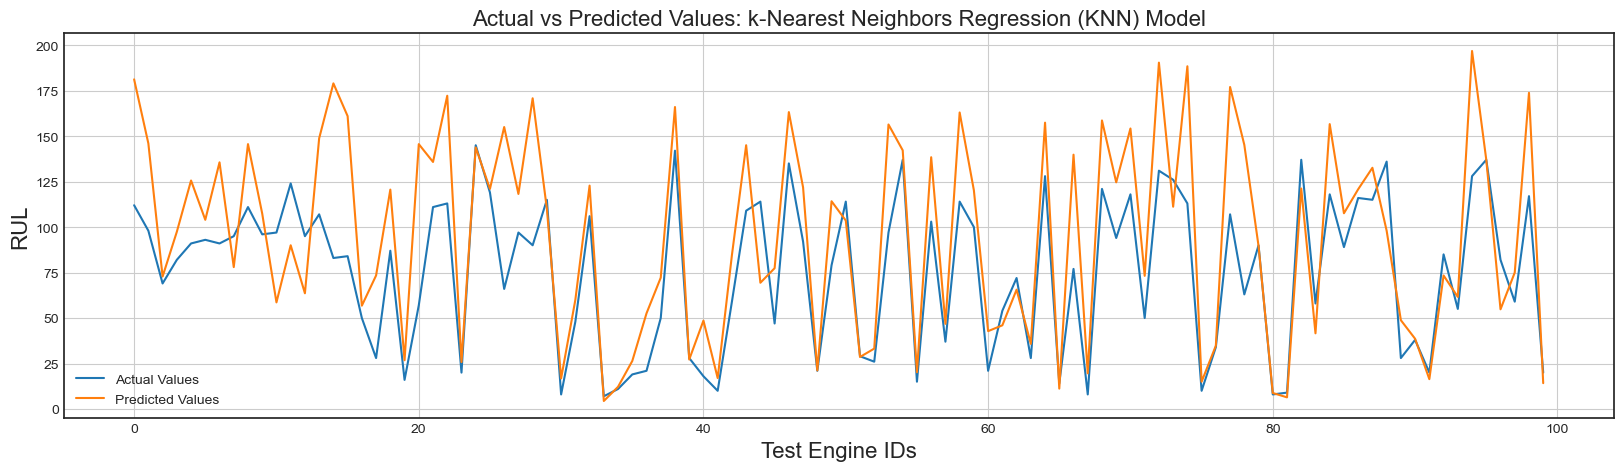

In [68]:
# Plotting a graph to compare the Actual Values and Predicted Values

# Initializing parameter
model_name = "k-Nearest Neighbors Regression (KNN)"

# Predicting using the selected model
y_test_pred = knn_model.predict(X_test_kpca)

# Plotting the Graph
plot_prediction_outputs(y_test , y_test_pred, df_train_dataset, model_name)

<a id='7.B'></a>
### B. Deep Learning Models

In [69]:
def generate_rul_targets(sequence_length, early_rul_threshold):
    
    
    capped_duration = sequence_length - early_rul_threshold
    
    if capped_duration <= 0:
        return np.arange(sequence_length - 1, -1, -1)
    
    else:
        capped_rul = early_rul_threshold * np.ones(capped_duration)
        decreasing_rul = np.arange(early_rul_threshold - 1, -1, -1)
        return np.append(capped_rul, decreasing_rul)

In [70]:
def create_sliding_windows(input_data, target_rul=None, window_size=30, stride=1):

    
    num_windows = int(np.floor((len(input_data) - window_size) / stride)) + 1
    num_features = input_data.shape[1]

    input_windows = np.empty((num_windows, window_size, num_features))
    
    if target_rul is None:
        for i in range(num_windows):
            start = i * stride
            end = start + window_size
            input_windows[i] = input_data[start:end, :]
        return input_windows
    
    else:
        target_windows = np.empty(num_windows)
        for i in range(num_windows):
            start = i * stride
            end = start + window_size
            input_windows[i] = input_data[start:end, :]
            target_windows[i] = target_rul[end - 1]
        return input_windows, target_windows

In [71]:
def prepare_test_windows(test_engine_data, window_size, stride, num_windows=1):
    
    max_possible_windows = int(np.floor((len(test_engine_data) - window_size) / stride)) + 1

    if max_possible_windows < num_windows:
        required_length = (max_possible_windows - 1) * stride + window_size
        sliced_data = test_engine_data[-required_length:, :]
        batched_windows = create_sliding_windows(sliced_data, target_rul=None,
                                                 window_size=window_size, stride=stride)
        return batched_windows, max_possible_windows
    else:
        required_length = (num_windows - 1) * stride + window_size
        sliced_data = test_engine_data[-required_length:, :]
        batched_windows = create_sliding_windows(sliced_data, target_rul=None,
                                                 window_size=window_size, stride=stride)
        return batched_windows, num_windows

In [72]:
# Features to drop from the dataset (e.g., low variance or irrelevant sensors)
excluded_cols = ["Engine_ID", "S1_Total_Temp_Fan_Inlet", "S5_Pressue_Fan_Inlet", "S6_Total_Pressure_Bypass_Duct",
                 "Operational_Setting_1_Altitude", "Operational_Setting_2_Mach_Number", 
                 "Operational_Setting_3_Sea_Level_Temperature", "S10_Engine_Pressure_Ratio", 
                 "S16_Burner_Fuel_Air_Ratio", "S18_Demanded_Fan_Speed", "S19_Demanded_Corrected_Fan_Speed"]

# Extract unit (engine) identifiers
train_unit_ids = df_train_dataset["Engine_ID"]
test_unit_ids = df_test_dataset["Engine_ID"]

# Initialize MinMaxScaler for normalization
scaler = MinMaxScaler()

# Normalize training and test features, excluding unit ID, operational settings, and irrelevant sensors
train_features_scaled = scaler.fit_transform(df_train_dataset.drop(columns = excluded_cols + ["RUL"]))
test_features_scaled = scaler.transform(df_test_dataset.drop(columns = excluded_cols))

# Reconstruct DataFrames with unit IDs as the first column
train_processed = pd.DataFrame(data=np.c_[train_unit_ids, train_features_scaled])
test_processed = pd.DataFrame(data=np.c_[test_unit_ids, test_features_scaled])

# Number of unique engines in training and testing sets
num_train_engines = train_processed[0].nunique()
num_test_engines = test_processed[0].nunique()

- Our main goal is predictive maintenance. To support this, we clip the Remaining Useful Life (RUL) of engines at a specific upper limit. This means any RUL value above that threshold is capped to the same value, simplifying the model's focus on engines nearing failure

- The clipping threshold is typically defined by domain experts, depending on the industry, risk level, and operational needs. Since we lack such expert input, we assume a threshold close to the mean failure time

- Based on the data, engine failure occurs between 127 and 361 cycles, with a mean of 205 and a standard deviation of 46. We choose to clip RUL values above 200 to 200

#### **Why clip RUL?**

- High RUL values indicate healthy engines far from failure. By capping them, we shift the model's attention toward engines that may soon require maintenance

- For practical use, we suggest a threshold of 125 cycles (early_rul). This acts as an early warning signal, prompting closer monitoring and potential action

In [73]:
# Initializing Parameters

window_length = 30
shift = 1
early_rul = 125
num_test_windows = 5

In [74]:
def scheduler_epoch(epoch):
    if epoch < 10:
        return 0.001
    else:
        return 0.0001

In [75]:
def evaluate_regression_metrics(true_rul, pred_rul, model_name):
    
    mse  = mean_squared_error(true_rul, pred_rul)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(true_rul, pred_rul)
    r2   = r2_score(true_rul, pred_rul)

    print(f"Metrics for the {model_name} model:")
    print(f"RMSE= {rmse:.5f}")
    print(f"MSE= {mse:.5f}")
    print(f"MAE= {mae:.5f}")
    print(f"R²= {r2:.5f}")
    print()

In [76]:
def run_training_and_evaluation(model_name, model, processed_train_data, processed_train_targets, 
                                processed_val_data, processed_val_targets, processed_test_data, 
                                true_rul, num_test_windows_list, epochs=50, batch_size=32, 
                                tf_callback = None, other_callback = None):

    
    print(f"<----- Training and Evaluating Model: {model_name} ----->\n")
    start_time = time.time()

    # Fit the model
    history_obj = model.fit(
        processed_train_data,
        processed_train_targets,
        epochs=epochs,
        validation_data=(processed_val_data, processed_val_targets),
        callbacks=[cb for cb in (tf_callback, other_callback) if cb is not None],
        batch_size=batch_size,
        verbose=0
    )

    # Predict RUL for all test windows (returns a flat array of size n_test_windows_total)
    rul_pred_flat = model.predict(processed_test_data, verbose=0).reshape(-1)

    preds_per_engine = np.split(
        rul_pred_flat,
        np.cumsum(num_test_windows_list)[:-1]
    )

    # Compute mean prediction per engine (simple average across that engine's windows)
    mean_pred_per_engine = [
        np.mean(preds_for_engine) 
        for preds_for_engine in preds_per_engine
    ]

    # Print final training/validation loss
    final_train_loss = history_obj.history["loss"][-1]
    final_val_loss   = history_obj.history["val_loss"][-1]
    print(f"Final Training Loss= {final_train_loss:.5f}")
    print(f"Final Validation Loss= {final_val_loss:.5f}")
    print("-" * 100) # Separator for clarity

    # Evaluate against true RUL per engine
    evaluate_regression_metrics(true_rul, mean_pred_per_engine, model_name)

    end_time = time.time()
    print(f"Time taken to build the model: {(end_time - start_time):.5f} seconds\n")
    
    history_train_loss = history_obj.history['loss']
    history_val_loss = history_obj.history['val_loss']
    
    return history_train_loss, history_val_loss

### Processing the Training Dataset for building DL Models

In [77]:
train_data_processed = []
train_targets_processed = []

for i in np.arange(1, num_train_engines + 1):
    temp_train_data = train_processed[train_processed[0] == i].drop(columns = [0]).values

    temp_train_targets = generate_rul_targets(sequence_length = temp_train_data.shape[0], early_rul_threshold = early_rul)
    data_for_a_machine, targets_for_a_machine = create_sliding_windows(temp_train_data, temp_train_targets, window_size = window_length, stride = shift)

    train_data_processed.append(data_for_a_machine)
    train_targets_processed.append(targets_for_a_machine)

train_data_processed = np.concatenate(train_data_processed)
train_targets_processed = np.concatenate(train_targets_processed)

### Processing the Testing Dataset for building DL Models

In [78]:
test_data_processed = []
num_test_windows_list = []

for i in np.arange(1, num_test_engines + 1):
    temp_test_data = test_processed[test_processed[0] == i].drop(columns = [0]).values

    # Preparing Test Dataset
    test_data_for_an_engine, num_windows = prepare_test_windows(temp_test_data, window_size = window_length, stride = shift, num_windows = num_test_windows)

    test_data_processed.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

test_data_processed = np.concatenate(test_data_processed)
df_rul_dataset = df_rul.drop(columns = ["Engine_ID"])
true_rul = df_rul_dataset.values

# Shuffling the Training Dataset Values 
index = np.random.permutation(len(train_targets_processed))
train_data_processed, train_targets_processed = train_data_processed[index], train_targets_processed[index]

In [79]:
# Checking the shape of the Processed Data

print("Shape of the Processed Training Dataset: ", train_data_processed.shape)
print("Shape of the Processed Training RULs: ", train_targets_processed.shape)
print("Shape of the Processed Test Dataset: ", test_data_processed.shape)
print("True RUL Shape: ", true_rul.shape)

Shape of the Processed Training Dataset:  (17731, 30, 15)
Shape of the Processed Training RULs:  (17731,)
Shape of the Processed Test Dataset:  (497, 30, 15)
True RUL Shape:  (100, 1)


##### *Inference:*

- The shape of train_data_processed is (17731, 30, 15), indicating that the training set contains 17,731 samples (engine windows), each with 30 time steps and 15 sensor features per time step. The corresponding train_targets_processed has a shape of (17731,), meaning there is one target RUL value for each training sample.

- The shape of test_data_processed is (497, 30, ), representing 497 test samples, each structured the same way with 30 time steps and 14 sensor readings per step.

- Finally, true_rul has a shape of (100,1), indicating the actual RUL values for 100 test engines.

In [80]:
train_data_processed, val_data_processed, train_targets_processed, val_targets_processed = train_test_split(train_data_processed,
                                                        train_targets_processed,
                                                        test_size = 0.2,
                                                        random_state = 16)
print("Shape of the Processed Training Dataset: ", train_data_processed.shape)
print("Shape of the Processed Validation Dataset: ", val_data_processed.shape)
print("Shape of the Processed Train Targets: ", train_targets_processed.shape)
print("Shape of the Processed Validation Targets: ", val_targets_processed.shape)

Shape of the Processed Training Dataset:  (14184, 30, 15)
Shape of the Processed Validation Dataset:  (3547, 30, 15)
Shape of the Processed Train Targets:  (14184,)
Shape of the Processed Validation Targets:  (3547,)


In [81]:
# Initializing Parameters

tfcallback_value = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback_value = tf.keras.callbacks.LearningRateScheduler(scheduler_epoch, verbose = 0)
batchsize_value = 50
epoch = 20

<a id='7.10'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 10: Convolutional Neural Network (CNN) </b>

In [82]:
# Defining the model function for CNN

def CNN_Model(kernel_size, pool_size):
  input_shape = (window_length, 15)
  model = Sequential([
    layers.Conv1D(128, kernel_size = kernel_size, padding = "same", activation="relu", input_shape = input_shape),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.Conv1D(128,kernel_size = kernel_size, padding = "same", activation="relu"),
    layers.MaxPooling1D(pool_size= pool_size, padding='same'),
    layers.GlobalAveragePooling1D(),
    layers.Dense(96, activation = "relu"),
    layers.Dense(128, activation = "relu"),
    layers.Dense(1)
  ])
  model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
  return model

CNN_Model(kernel_size = 3, pool_size = 2).summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 128)           5888      
                                                                 
 max_pooling1d (MaxPooling1  (None, 15, 128)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 15, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                      

In [83]:
# Initializing Parameters
model_name = "Convolutional Neural Network (CNN)"
kernel_size = 3
pool_size = 2
cnn_model = CNN_Model(kernel_size= kernel_size , pool_size = pool_size)
model = cnn_model

# Evaluating CNN Model
train_loss_value, val_loss_value = run_training_and_evaluation(model_name, model, train_data_processed, train_targets_processed, 
                                                               val_data_processed, val_targets_processed, test_data_processed, 
                                                               true_rul, num_test_windows_list, epochs = epoch, batch_size = batchsize_value, 
                                                               tf_callback = tfcallback_value, other_callback = callback_value)

<----- Training and Evaluating Model: Convolutional Neural Network (CNN) ----->


Final Training Loss= 183.29216
Final Validation Loss= 186.79863
----------------------------------------------------------------------------------------------------
Metrics for the Convolutional Neural Network (CNN) model:
RMSE= 15.75146
MSE= 248.10841
MAE= 11.69312
R²= 0.85632

Time taken to build the model: 146.81461 seconds



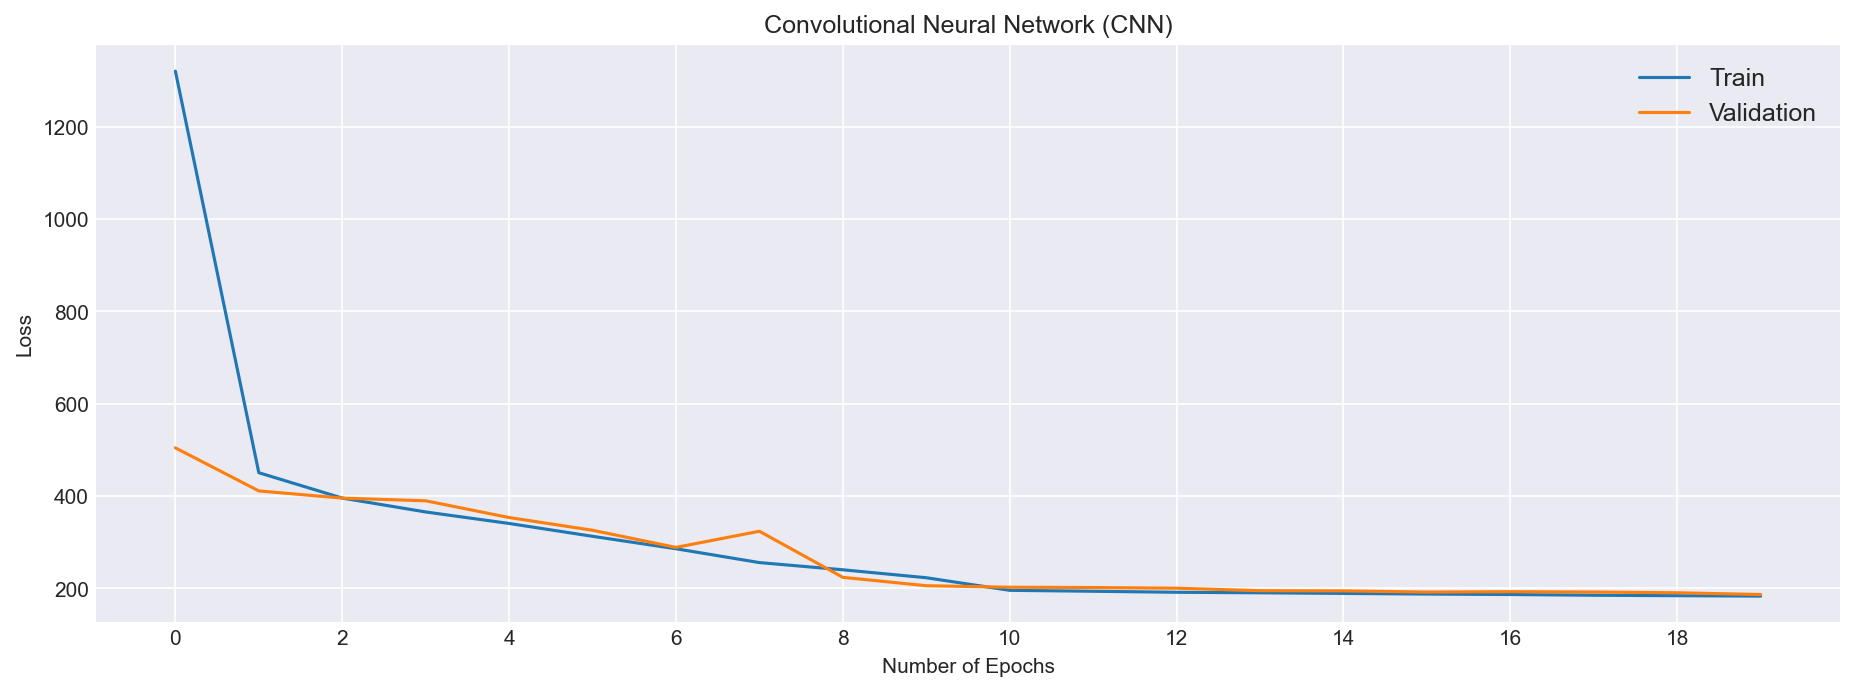

In [84]:
# Plotting Convergence History of the Model

plt.figure(figsize = (15, 5), dpi = 150)
plt.style.use("seaborn-dark")
plt.plot(train_loss_value)
plt.plot(val_loss_value)
plt.title(model_name)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend(["Train", "Validation"], fontsize =12)
plt.grid("on")
plt.xticks(range(0, len(train_loss_value), 2)) 
plt.show()

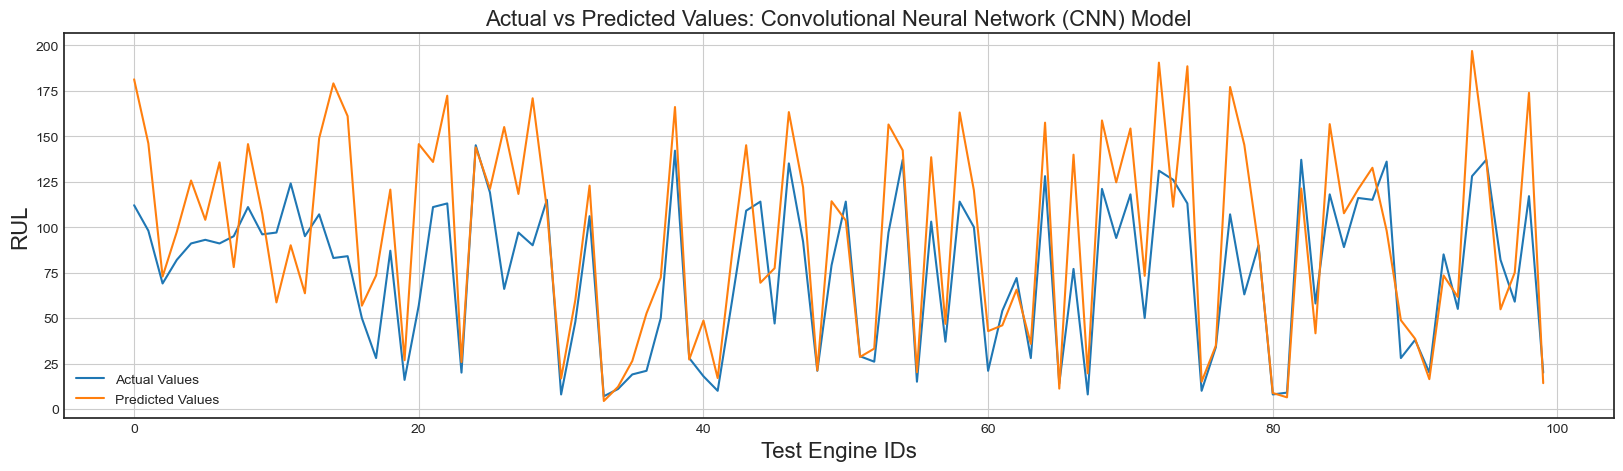

In [85]:
# Plotting a graph to compare the Actual Values and Predicted Values

rul_pred = cnn_model.predict(test_data_processed, verbose=0).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                          for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
y_true = true_rul.reshape(1,len(true_rul))[0]

# Plotting the Graph
plot_prediction_outputs(y_true , y_test_pred, df_train_dataset, model_name)

<a id='7.11'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 11: Long Short-Term Memory (LSTM) </b>

In [86]:
# Defining the model function for LSTM

def LSTM_model():
    input_shape = (window_length, 15)
    model = Sequential([
        layers.LSTM(128, input_shape = input_shape , activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

LSTM_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               73728     
                                                                 
 dense_6 (Dense)             (None, 96)                12384     
                                                                 
 dense_7 (Dense)             (None, 128)               12416     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 98657 (385.38 KB)
Trainable params: 98657 (385.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [87]:
# Initializing Parameters
model_name = "Long Short-Term Memory (LSTM)"
lstm_model = LSTM_model()
model = lstm_model

# Evaluating LSTM Model
train_loss_value, val_loss_value = run_training_and_evaluation(model_name, model, train_data_processed, train_targets_processed, 
                                                               val_data_processed, val_targets_processed, test_data_processed, 
                                                               true_rul, num_test_windows_list, epochs = epoch, batch_size = batchsize_value, 
                                                               tf_callback = tfcallback_value, other_callback = callback_value)

<----- Training and Evaluating Model: Long Short-Term Memory (LSTM) ----->

Final Training Loss= 141.43118
Final Validation Loss= 140.21753
----------------------------------------------------------------------------------------------------
Metrics for the Long Short-Term Memory (LSTM) model:
RMSE= 14.23824
MSE= 202.72739
MAE= 10.46046
R²= 0.88260

Time taken to build the model: 523.38460 seconds



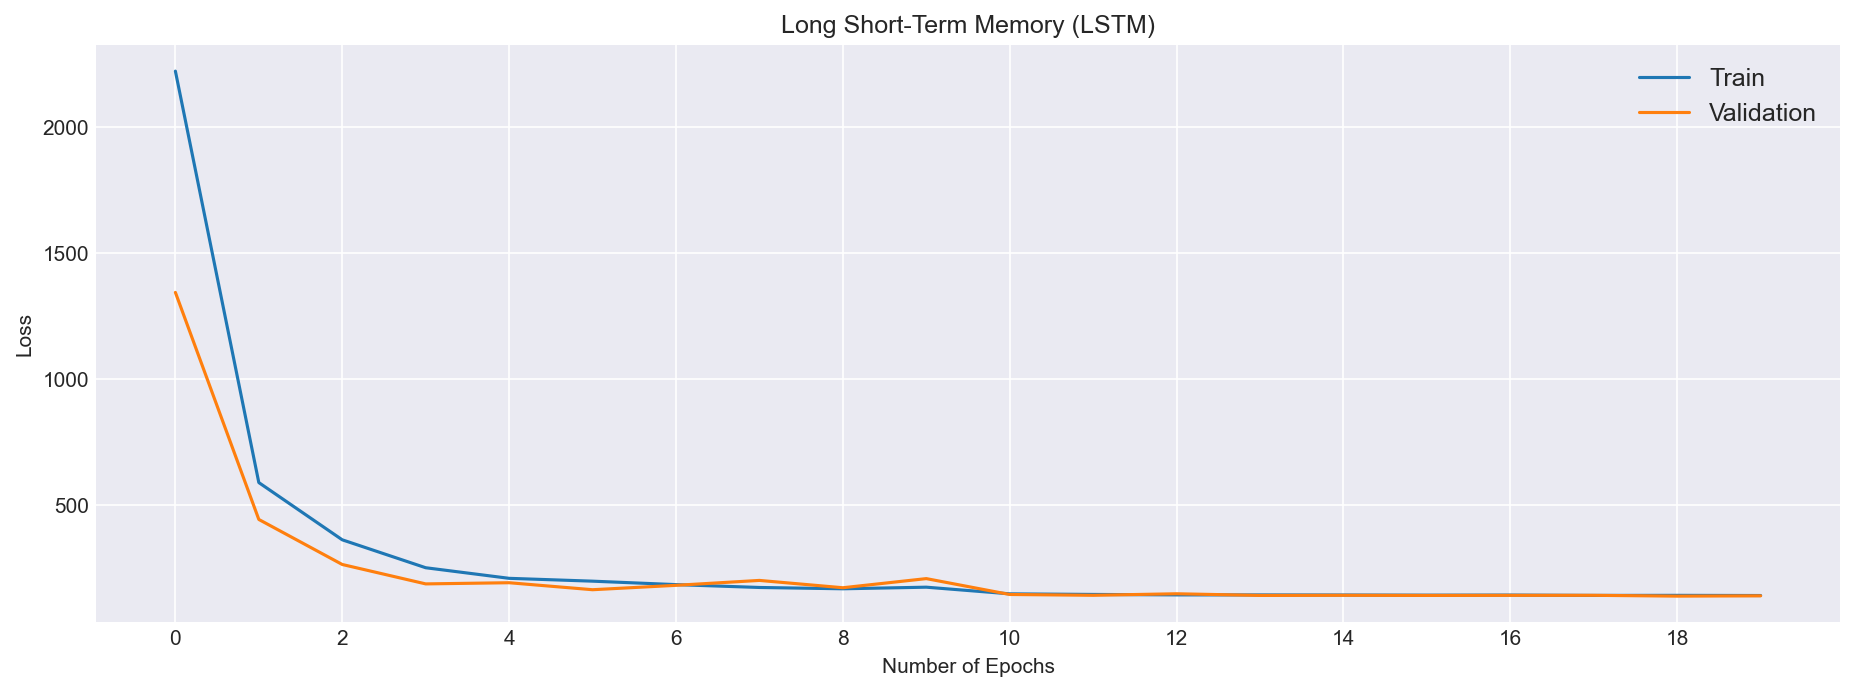

In [88]:
# Plotting Convergence History of the Model

plt.figure(figsize = (15, 5), dpi = 150)
plt.style.use("seaborn-dark")
plt.plot(train_loss_value)
plt.plot(val_loss_value)
plt.title(model_name)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend(["Train", "Validation"], fontsize =12)
plt.grid("on")
plt.xticks(range(0, len(train_loss_value), 2)) 
plt.show()

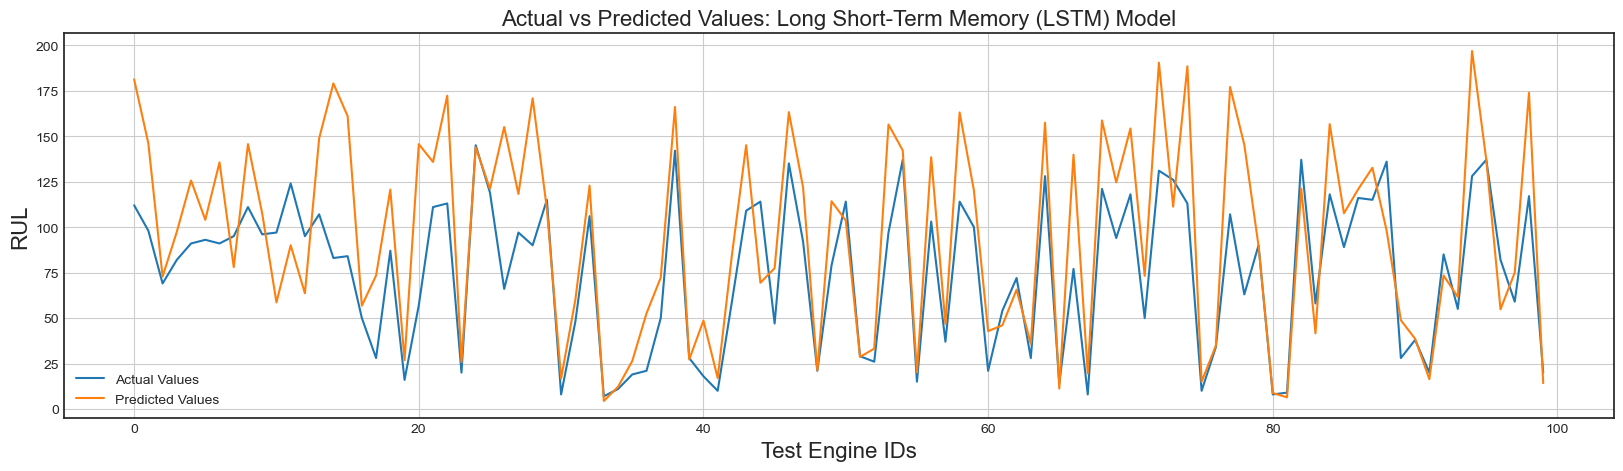

In [89]:
# Plotting a graph to compare the Actual Values and Predicted Values

rul_pred = lstm_model.predict(test_data_processed, verbose=0).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                          for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
y_true = true_rul.reshape(1,len(true_rul))[0]

# Plotting the Graph
plot_prediction_outputs(y_true , y_test_pred, df_train_dataset, model_name)

<a id='7.12'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 12: Bidirectional Long Short-Term Memory (Bi-LSTM) </b>

In [90]:
# Defining the model function for Bi-LSTM

def Bi_LSTM_model():
    
    input_shape = (window_length, 15)
    model = Sequential([
        layers.Bidirectional( LSTM(128, return_sequences = True, activation = "tanh") ),
        layers.Bidirectional( LSTM(64, activation = "tanh", return_sequences = True) ),
        layers.Bidirectional( LSTM(32, activation = "tanh") ),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    
    return model

In [91]:
# Initializing Parameters
model_name = "Bidirectional Long Short-Term Memory (Bi-LSTM)"
bi_lstm_model = Bi_LSTM_model()
model = bi_lstm_model

# Evaluating LSTM Model
train_loss_value, val_loss_value = run_training_and_evaluation(model_name, model, train_data_processed, train_targets_processed, 
                                                               val_data_processed, val_targets_processed, test_data_processed, 
                                                               true_rul, num_test_windows_list, epochs = epoch, batch_size = batchsize_value, 
                                                               tf_callback = tfcallback_value, other_callback = callback_value)

<----- Training and Evaluating Model: Bidirectional Long Short-Term Memory (Bi-LSTM) ----->

Final Training Loss= 144.66078
Final Validation Loss= 143.62558
----------------------------------------------------------------------------------------------------
Metrics for the Bidirectional Long Short-Term Memory (Bi-LSTM) model:
RMSE= 14.28640
MSE= 204.10136
MAE= 10.24299
R²= 0.88181

Time taken to build the model: 1121.71392 seconds



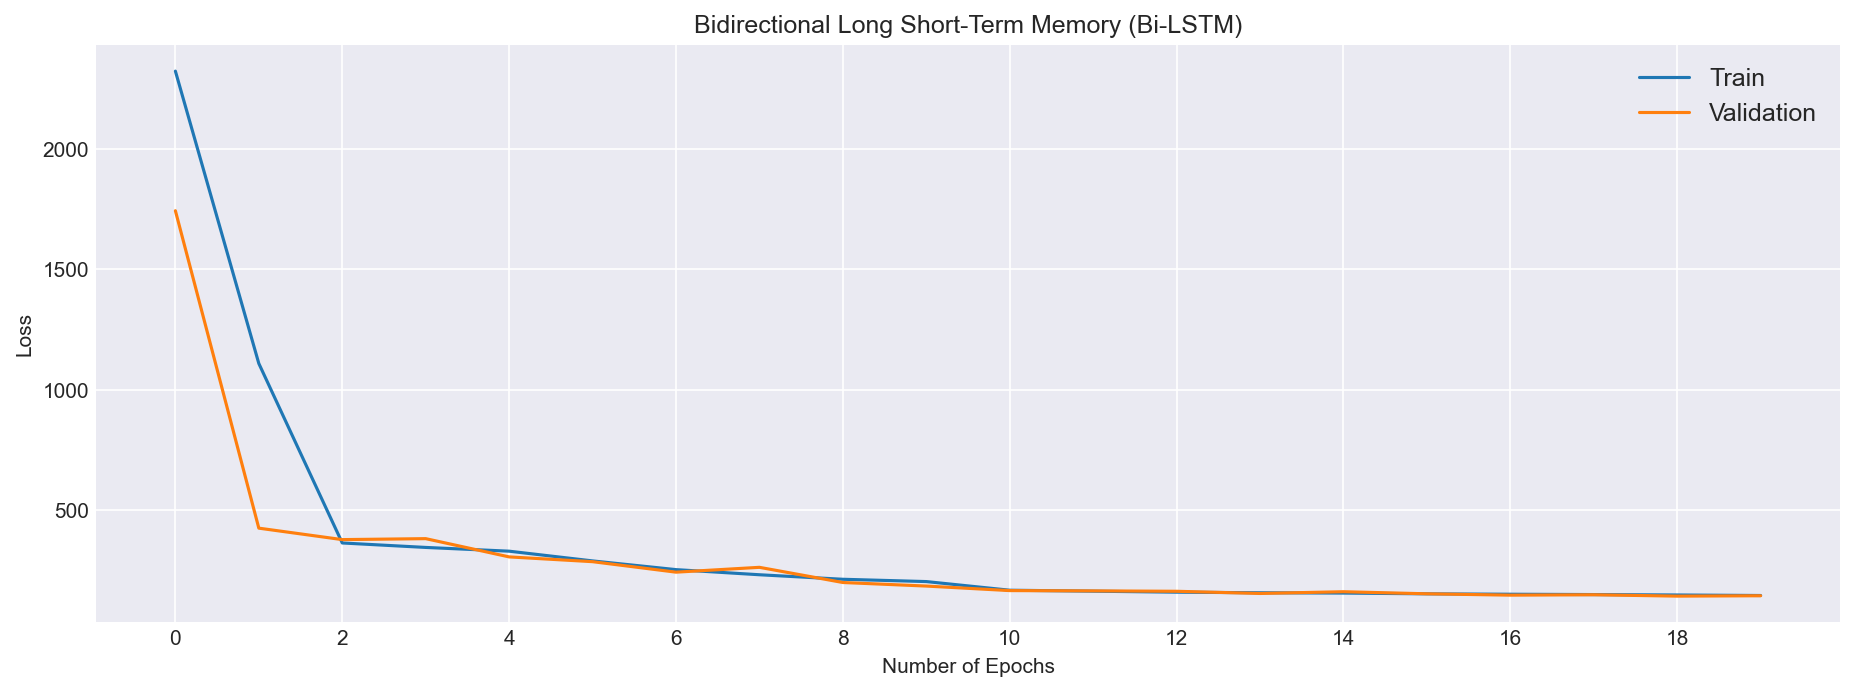

In [92]:
# Plotting Convergence History of the Model

plt.figure(figsize = (15, 5), dpi = 150)
plt.style.use("seaborn-dark")
plt.plot(train_loss_value)
plt.plot(val_loss_value)
plt.title(model_name)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend(["Train", "Validation"], fontsize =12)
plt.grid("on")
plt.xticks(range(0, len(train_loss_value), 2)) 
plt.show()

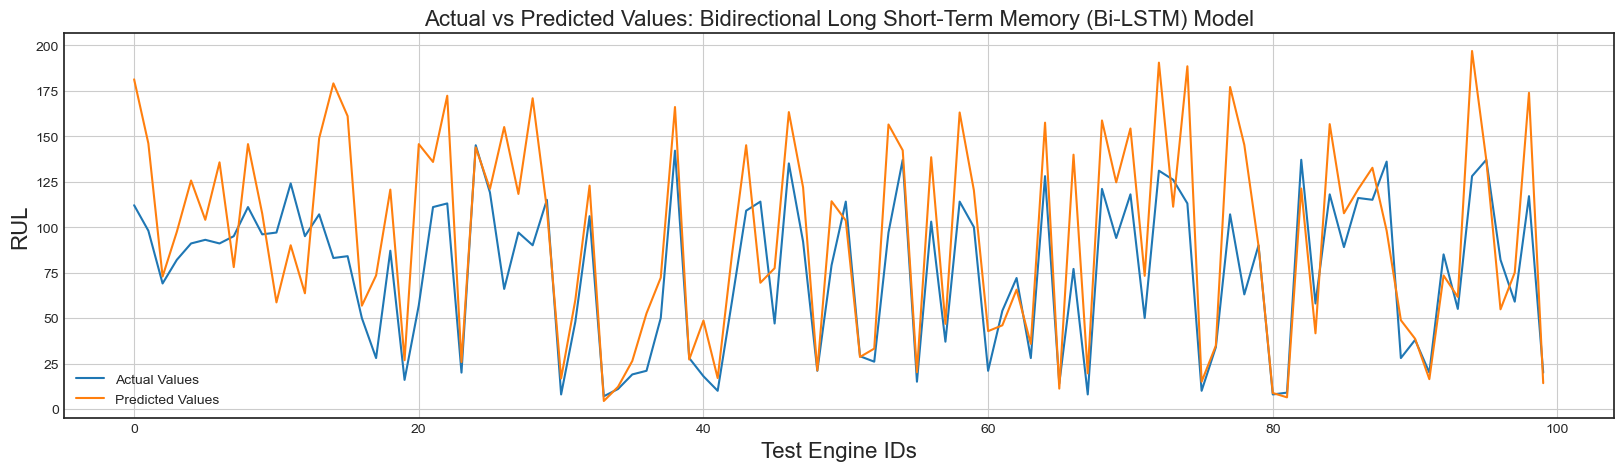

In [93]:
# Plotting a graph to compare the Actual Values and Predicted Values

rul_pred = bi_lstm_model.predict(test_data_processed, verbose=0).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                          for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
y_true = true_rul.reshape(1,len(true_rul))[0]

# Plotting the Graph
plot_prediction_outputs(y_true , y_test_pred, df_train_dataset, model_name)

<a id='7.13'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 13: Attention-Based Multihead (AMH) Model </b>

In [94]:
# Reshape for AMH

X_train_kpca_seq = X_train_kpca.reshape(X_train_kpca.shape[0], 5, 1)
X_val_kpca_seq = X_val_kpca.reshape(X_val_kpca.shape[0], 5, 1)
X_test_kpca_seq = X_test_kpca.reshape(X_test_kpca.shape[0], 5, 1)

In [95]:
def build_ahm_model(input_shape, heads=2):
    inputs = Input(shape=input_shape)
    x = layers.Dense(16, activation='relu')(inputs)
    attn_output = layers.MultiHeadAttention(num_heads=heads, key_dim=8)(x, x)
    x = layers.Add()([x, attn_output])
    x = layers.LayerNormalization()(x)

    ffn = layers.Dense(32, activation='relu')(x)
    ffn = layers.Dense(16, activation='relu')(ffn)
    x = layers.Add()([x, ffn])
    x = layers.LayerNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(16, activation='relu')(x)
    output = layers.Dense(1)(x)

    model = models.Model(inputs=inputs, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

AHM_model = build_ahm_model(input_shape=(5, 1))
AHM_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 dense_15 (Dense)            (None, 5, 16)                32        ['input_1[0][0]']             
                                                                                                  
 multi_head_attention (Mult  (None, 5, 16)                1088      ['dense_15[0][0]',            
 iHeadAttention)                                                     'dense_15[0][0]']            
                                                                                                  
 add (Add)                   (None, 5, 16)                0         ['dense_15[0][0]',       

In [96]:
start_time = time.time()

history = AHM_model.fit(
    X_train_kpca_seq, y_train,
    validation_data=(X_val_kpca_seq, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=1
)

training_time = time.time() - start_time

# Evaluating on the Test Datset
y_pred_test = AHM_model.predict(X_test_kpca_seq)

model_name = "Attention-Based Multihead (AMH) Model"
print(f"<----- Training and Evaluating Model: {model_name} ----->\n")


# Print final training/validation loss
final_train_loss = history.history['loss'][-1]
final_val_loss   = history.history['val_loss'][-1]

print(f"Final Training Loss= {final_train_loss:.5f}")
print(f"Final Validation Loss= {final_val_loss:.5f}")
print(f"Time taken to build the model: {(training_time):.5f} seconds\n")
print("-" * 100) # Separator for clarity

# Evaluate against true RUL per engine
evaluate_regression_metrics(true_rul, y_pred_test, model_name)

Epoch 1/20

226/226 [==============================] - 13s 27ms/step - loss: 14285.7256 - mae: 98.4389 - val_loss: 11551.1357 - val_mae: 85.1595
Epoch 2/20
226/226 [==============================] - 5s 22ms/step - loss: 7688.0635 - mae: 66.9177 - val_loss: 4361.2305 - val_mae: 47.9081
Epoch 3/20
226/226 [==============================] - 5s 23ms/step - loss: 3305.3506 - mae: 42.7380 - val_loss: 2954.2346 - val_mae: 40.1422
Epoch 4/20
226/226 [==============================] - 5s 23ms/step - loss: 2707.4873 - mae: 38.9142 - val_loss: 2691.4314 - val_mae: 37.8376
Epoch 5/20
226/226 [==============================] - 5s 22ms/step - loss: 2534.9475 - mae: 37.5570 - val_loss: 2606.1326 - val_mae: 38.3716
Epoch 6/20
226/226 [==============================] - 5s 23ms/step - loss: 2473.3325 - mae: 37.0389 - val_loss: 2578.5059 - val_mae: 36.8837
Epoch 7/20
226/226 [==============================] - 5s 24ms/step - loss: 2457.7952 - mae: 36.8991 - val_loss: 2561.4893 - val_mae: 36.6038
Epoch 8/2

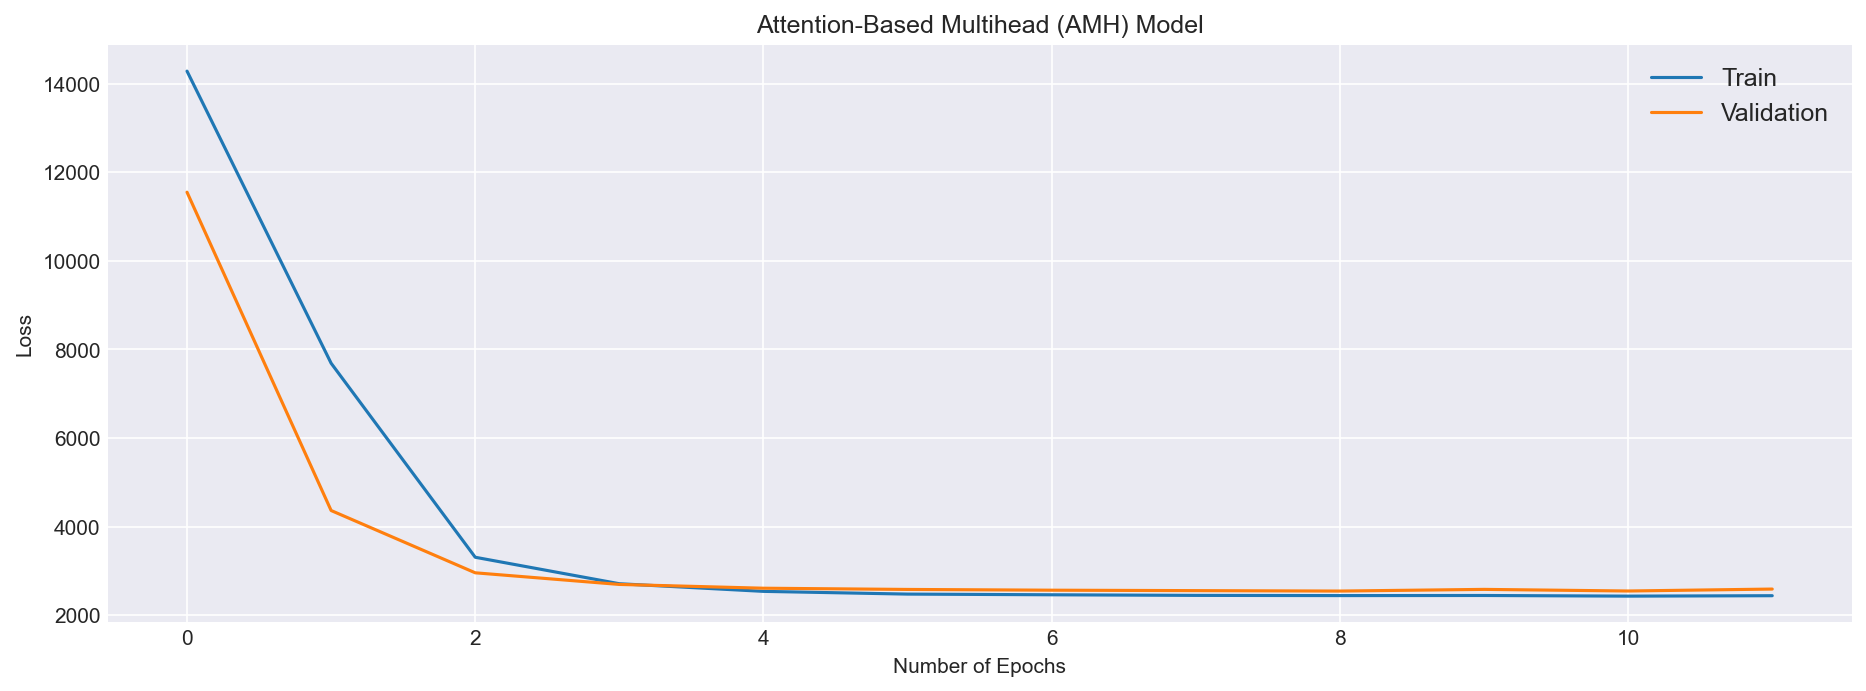

In [97]:
# Plotting Convergence History of the Model

plt.figure(figsize = (15, 5), dpi = 150)
plt.style.use("seaborn-dark")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(model_name)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend(["Train", "Validation"], fontsize =12)
plt.grid("on")
plt.show()

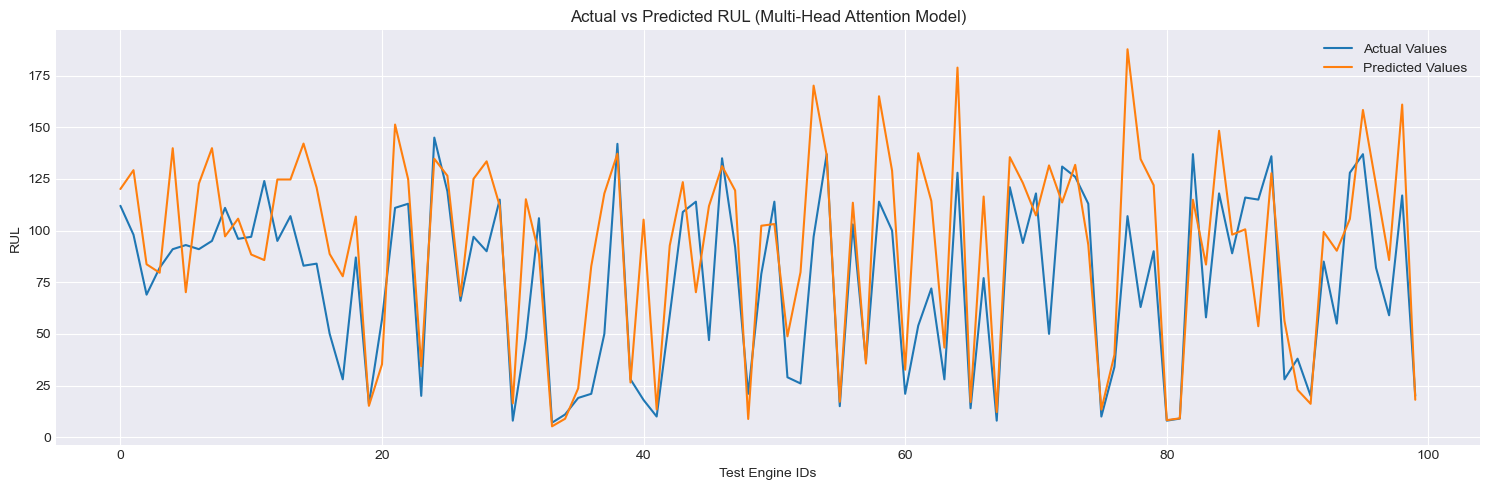

In [98]:
# Predict RULs using the trained Multi-Head Attention model
rul_pred = AHM_model.predict(X_test_kpca_seq, verbose=0).reshape(-1)

y_pred = rul_pred
y_true = y_test.values.reshape(-1)

# Plotting Actual vs Predicted RUL
plt.figure(figsize=(15, 5))
plt.plot(y_true, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title("Actual vs Predicted RUL (Multi-Head Attention Model)")
plt.xlabel("Test Engine IDs")
plt.ylabel("RUL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<a id='7.14'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Model 14: Hybrid Model (CNN + LSTM) </b>

In [99]:
# Defining the model function for Hybrid Model (CNN + LSTM)

def CNN_LSTM_model(kernel_size,pool_size):
    input_shape = (window_length, 15)
    model = Sequential([
        layers.Conv1D(128, kernel_size = kernel_size, padding = "same", activation="relu", input_shape = input_shape),
        layers.MaxPooling1D(pool_size= pool_size, padding='same'),
        layers.Conv1D(128,kernel_size = kernel_size, padding = "same", activation="relu"),
        layers.MaxPooling1D(pool_size= pool_size, padding='same'),
        layers.TimeDistributed(Flatten()),
        layers.LSTM(128, return_sequences = True, activation = "tanh"),
        layers.LSTM(64, activation = "tanh", return_sequences = True),
        layers.LSTM(32, activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    
    return model

CNN_LSTM_model(kernel_size = 3, pool_size = 2).summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 30, 128)           5888      
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 15, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 15, 128)           49280     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 time_distributed (TimeDist  (None, 8, 128)            0         
 ributed)                                                        
                                                      

In [100]:
# Initializing Parameters
model_name = "Hybrid Model (CNN + LSTM)"
kernel_size = 3
pool_size = 2
cnn_lstm_model = CNN_LSTM_model(kernel_size= kernel_size , pool_size = pool_size)
model = cnn_lstm_model

# Evaluating LSTM Model
train_loss_value, val_loss_value = run_training_and_evaluation(model_name, model, train_data_processed, train_targets_processed, 
                                                               val_data_processed, val_targets_processed, test_data_processed, 
                                                               true_rul, num_test_windows_list, epochs = epoch, batch_size = batchsize_value, 
                                                               tf_callback = tfcallback_value, other_callback = callback_value)

<----- Training and Evaluating Model: Hybrid Model (CNN + LSTM) ----->

Final Training Loss= 102.34302
Final Validation Loss= 109.10215
----------------------------------------------------------------------------------------------------
Metrics for the Hybrid Model (CNN + LSTM) model:
RMSE= 14.61343
MSE= 213.55229
MAE= 11.14429
R²= 0.87634

Time taken to build the model: 485.61351 seconds



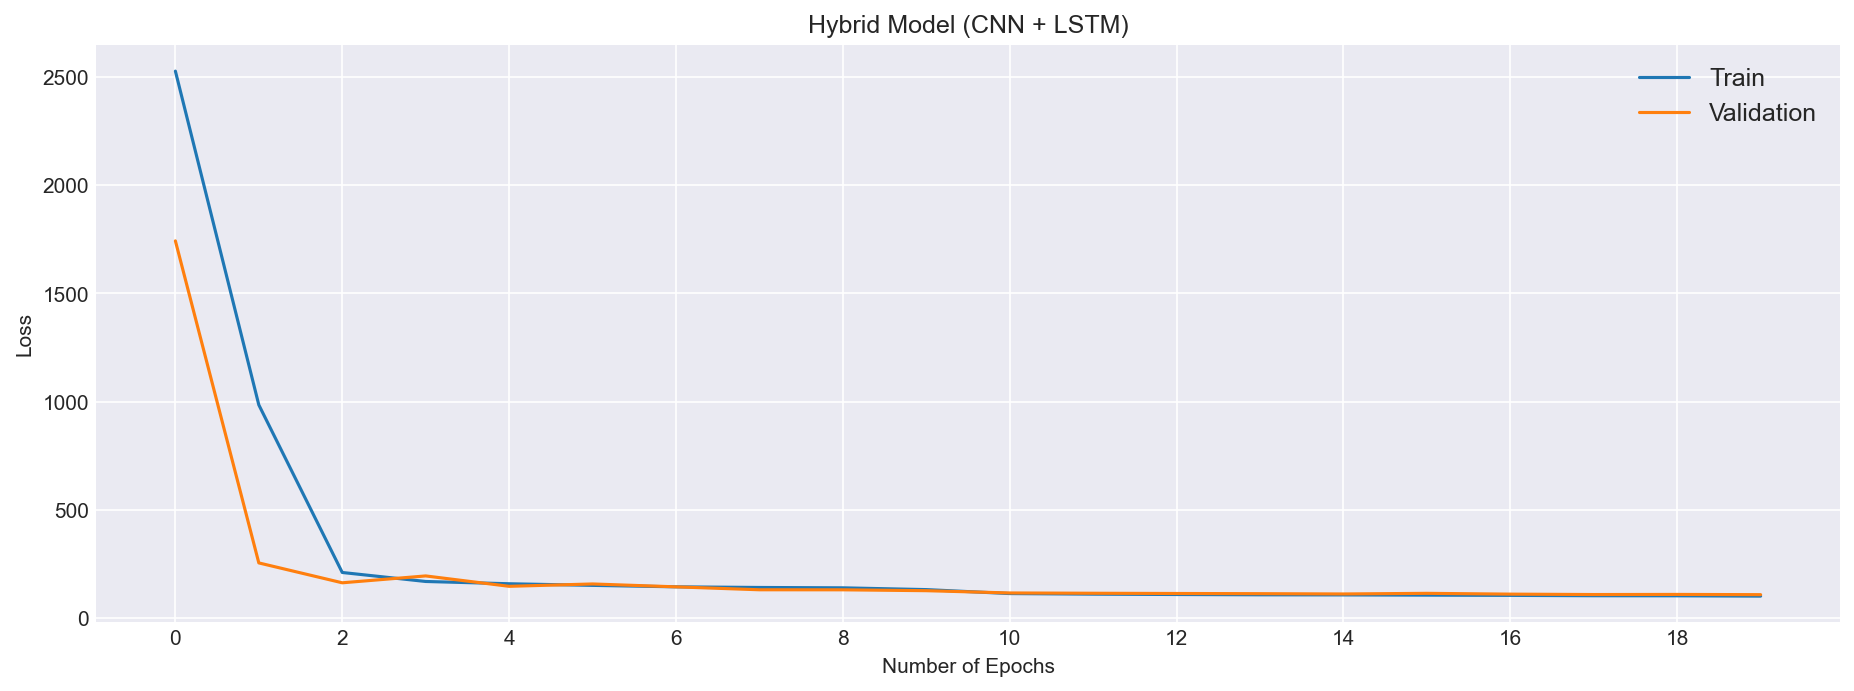

In [101]:
# Plotting Convergence History of the Model

plt.figure(figsize = (15, 5), dpi = 150)
plt.style.use("seaborn-dark")
plt.plot(train_loss_value)
plt.plot(val_loss_value)
plt.title(model_name)
plt.ylabel("Loss")
plt.xlabel("Number of Epochs")
plt.legend(["Train", "Validation"], fontsize =12)
plt.grid("on")
plt.xticks(range(0, len(train_loss_value), 2)) 
plt.show()

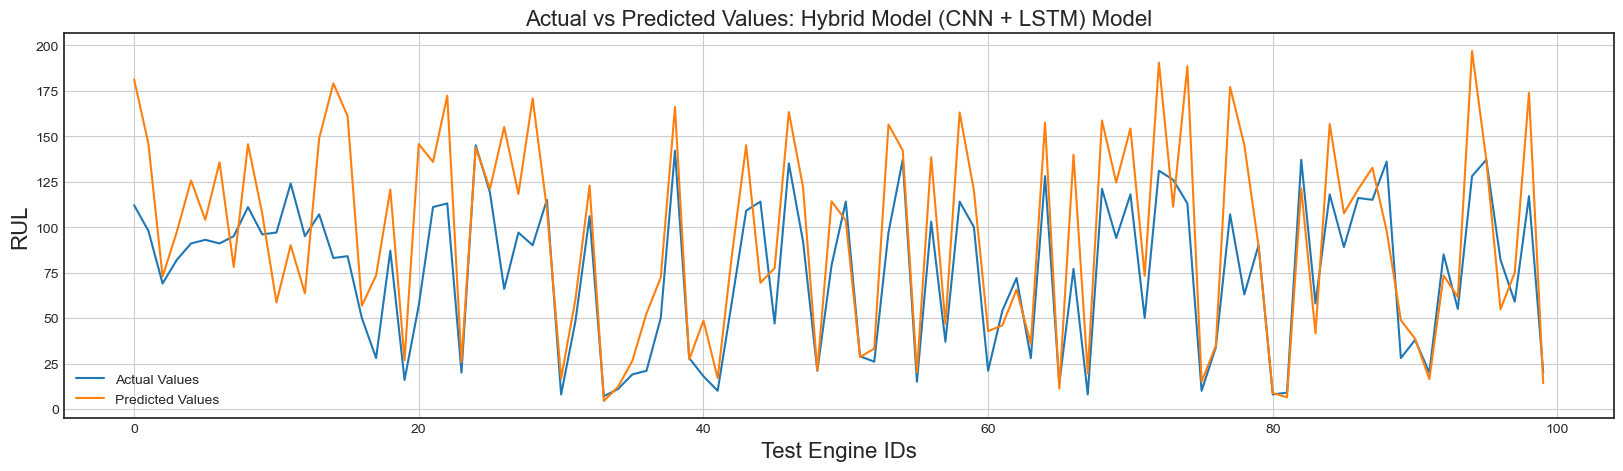

In [102]:
# Plotting a graph to compare the Actual Values and Predicted Values

rul_pred = cnn_lstm_model.predict(test_data_processed, verbose=0).reshape(-1)
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows))
                          for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
y_true = true_rul.reshape(1,len(true_rul))[0]

# Plotting the Graph
plot_prediction_outputs(y_true , y_test_pred, df_train_dataset, model_name)

<a id='8'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Evaluation </b>

| Model Name                                 | R2 Score (Test) | RMSE Value (Test) | MSE Value (Test) | MAE Value (Test) | Time Taken to Build Model (seconds) |
|------------------------------------------|-----------------|-------------------|------------------|------------------|-------------------------------------|
| Simple Linear Regression (SLR)           | 0.42622         | 31.47757          | 990.83770        | 25.44271         | 0.01384                             |
| Support Vector Regression (SVR)          | 0.61370         | 25.82822          | 667.09686        | 18.23361         | 34.48808                            |
| Decision Tree Regression (DT)            | -0.30994        | 47.56154          | 2262.10000       | 34.34000         | 0.39716                             |
| Gradient Boosting Regression (GBR)       | 0.46937         | 30.27101          | 916.33389        | 21.82145         | 13.80399                            |
| LightGBM Regression                      | 0.30791         | 34.57095          | 1195.15032       | 24.22060         | 246.53693                           |
| AdaBoost Regression                      | 0.03672         | 40.78551          | 1663.45780       | 31.08355         | 1.11854                             |
| XGBoost Regression                       | 0.33827         | 33.80409          | 1142.71680       | 23.47611         | 1.65913                             |
| Random Forest                            | 0.35236         | 33.44244          | 1118.39708       | 24.26590         | 0.39716                             |
| k-Nearest Neighbors (KNN) Regression   | 0.26440         | 35.64095          | 1270.27760       | 26.36800         | 0.03837                             |
| Convolutional Neural Network (CNN)       | 0.85632         | 15.75146          | 248.10841        | 11.69312         | 146.81461                           |
| Long Short-Term Memory (LSTM)            | 0.88260         | 14.23824          | 202.72739        | 10.46046         | 523.38460                           |
| Bidirectional Long Short-Term Memory (Bi-LSTM) | 0.88181         | 14.28640          | 204.10136        | 10.24299         | 1121.71392                          |
| Attention-Based Multihead (AMH) Model    | 0.33113         | 33.98616          | 1155.05893       | 25.63164         | 69.70894                            |
| Hybrid Model (CNN + LSTM)                | 0.87634         | 14.61343          | 213.55229        | 11.14429         | 485.61351                           |

<a id='9'></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#000000; border-radius:5px; font-size:100%"> <b>Conclusion </b>

The aim is to find the most effective and cost-effective model suitable for real-time monitoring and mitigation planning of engine health, while pointing out the advantages and disadvantages of each model in regards to performance and resources utilized.

- **Machine Learning (ML) Models:**
    The **Support Vector Regression (SVR) model** demonstrates the highest R² Score of 0.61370 on the test dataset. The model shows a relatively good ability to explain the variance in RUL.
    The **Simple Linear Regression (SLR)** model stands out as the fastest to build with a time of 0.01384 seconds although its R² Score is moderate at 0.42622.

<br>

- **Deep Learning (DL) Models:**
    The **Long Short-Term Memory (LSTM) model** achieved the highest R² Score of 0.88260 which demonstrates strong predictive capabilities for RUL.
    The **Convolutional Neural Network (CNN) model** achieved a good R² Score of 0.85632 with a training time of 146.81461 seconds which is lower than other high-performing DL models such as LSTM, Bi-LSTM and the Hybrid model.

**Recommendation for Real-Time Monitoring and Mitigation Planning:**

- The choice depends on the specific operational trade-offs between predictive accuracy and computational cost/time

- If maximum accuracy is paramount and computational resources for training are available, the **LSTM model** is the most effective (Test R² Score: 0.88260). Its ability to understand temporal sequences makes it highly suitable for RUL prediction

- For a balance between high effectiveness and better cost-effectiveness within DL models, the **CNN model** offers a strong alternative. It provides good accuracy (Test R² Score: 0.85632) with a significantly reduced training time (146.81461 seconds) compared to LSTM (523.38460 seconds) or the Hybrid model (485.61351 seconds)

- If computational resources are highly constrained or extremely fast model (re)training is needed and a moderate level of accuracy is acceptable, **Support Vector Regression (SVR)** from the ML models presents the best accuracy-to-cost trade-off among them. While SLR (Test R² Score: 0.42622, Time: 0.01384s) and KNN (Test R² Score: 0.26440, Time: 0.03837s) are faster, SVR's R² Score (Test R² Score: 0.61370, Time: 34.48808s) is notably better